# Importing speech sentiments from Colab notebook

Previous steps of the data cleaning are not included in this notebook. Yet, I will shortly explain how the dataset come together to what it is now:
- The collection of the dataset goes back to ECB's page [ https://www.ecb.europa.eu/press/key/date/html/index.en.html ] that contains list of the speeches delivered by the Board members of the ECB for each day along with other details such as speaker and the topic or type of meeting.
- The dataset initially contained slightly more than 1200 observations, then speeches that has no translation in english, and given only in the speaker's language has been eliminated.
- The dataset has been split into small chunks in order for the FinBERT - the language model that particularly is used to extract sentiments of the text in the finance domain - to be able to process it. The limit for the FinBERT is 512 tensors per observation, and the speech has been split into chunks that matches the size with smaller margin of difference. Yet, the text is split into chunks with cross point being the closest full stop to the limit in order to maintain the coherence of the speech.
- Then the speech fragments along with their corresponding dates has been stored as another file comprising more than 45,000 observations , and the language model has been utilized on Cloud environment leveraging high performance GPU power to process it, and extract the sentiments.
- The language model classifies the parts of the speeches into three classes: negative, neutral and positive with probabilities ranging from 0 to 1.
- Utilizing the high-performance GPUs, I obtained the file in the following that has index, date column indicating the date the speech is delivered, content, the sentiment the model classified, it's probability, and info_channel is an indicator variable if the content comes from speeches, policy announcements or press releases. 

## If you are not in a Git repository, you can import the merged_df in later stages. This code is to present how the different variables are brought together for this study.

In [1]:
import pandas as pd

# import the data
sentiments = pd.read_csv("src/Data/speech_all_finbert.csv").drop(columns=["Unnamed: 0"])
sentiments['info_channel'] = 'speech'
sentiments

,date,content,sentiment,probability,info_channel
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...,positive,0.854208,speech
1,1998-07-17,Economic growth has been driven increasingly b...,positive,0.947828,speech
2,1998-07-17,"In principle, the economic performance I have ...",neutral,0.600082,speech
3,1998-07-17,"Third, further structural adjustments in fisca...",neutral,0.824068,speech
4,1998-07-17,There is currently no sign of exchange rate te...,neutral,0.756298,speech
...,...,...,...,...,...
46014,2022-02-25,Since the exchange of confidential information...,positive,0.664321,speech
46015,2022-02-25,"Last year, following discussions in the Counci...",neutral,0.762738,speech
46016,2022-02-25,This type of measure has so far only been impl...,neutral,0.897179,speech
46017,2022-02-25,The ECB incorporated in its opinions its exper...,neutral,0.868921,speech


In [2]:
import pandas as pd

def descriptive_statistics_to_latex(df):
    """
    Convert a DataFrame containing speech dates into a LaTeX table format 
    showing the frequency of speeches by month for each year.

    The function extracts the year and month from the 'date' column, computes 
    the frequency of speeches for each month and year, and then formats the 
    results into a LaTeX table.

    Parameters:
    - df (pandas.DataFrame): DataFrame containing a 'date' column with speech dates.

    Returns:
    - str: A string containing the LaTeX table representation of the speech frequency.
    """
    # Extract year and month from 'date' column
    df['year'] = pd.to_datetime(df['date']).dt.year
    df['month'] = pd.to_datetime(df['date']).dt.month
    
    # Frequency of speeches by month for each year
    monthly_count = df.groupby(['year', 'month']).size().unstack(fill_value=0)
    
    # Adding a column for yearly total
    monthly_count['Total'] = monthly_count.sum(axis=1)
    
    # Rename month columns for clarity
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_count.columns = month_names + ['Total']
    
    # Add a row for monthly total
    monthly_count.loc['Total', :] = monthly_count.sum(axis=0)
    
    # Convert the DataFrame to integer type
    monthly_count = monthly_count.astype(int)
    
    # Convert to LaTeX format
    latex_output = monthly_count.to_latex()

    return latex_output

# create a latex table using the function
latex_table = descriptive_statistics_to_latex(sentiments)
print(latex_table)


\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & Jan & Feb & Mar & Apr & May & Jun & Jul & Aug & Sep & Oct & Nov & Dec & Total \\
year &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
1998 & 0 & 0 & 0 & 0 & 0 & 0 & 14 & 0 & 17 & 53 & 33 & 19 & 136 \\
1999 & 112 & 39 & 94 & 30 & 114 & 167 & 59 & 0 & 108 & 174 & 135 & 68 & 1100 \\
2000 & 77 & 45 & 85 & 51 & 83 & 77 & 62 & 0 & 133 & 209 & 116 & 30 & 968 \\
2001 & 42 & 77 & 57 & 16 & 134 & 96 & 43 & 0 & 79 & 68 & 88 & 0 & 700 \\
2002 & 63 & 63 & 94 & 60 & 66 & 44 & 37 & 0 & 65 & 66 & 17 & 25 & 600 \\
2003 & 9 & 52 & 43 & 32 & 49 & 40 & 37 & 0 & 34 & 23 & 67 & 112 & 498 \\
2004 & 20 & 111 & 12 & 219 & 185 & 103 & 62 & 13 & 114 & 140 & 132 & 99 & 1210 \\
2005 & 27 & 100 & 129 & 120 & 72 & 254 & 30 & 10 & 98 & 107 & 69 & 134 & 1150 \\
2006 & 78 & 82 & 99 & 85 & 287 & 191 & 156 & 26 & 15 & 124 & 116 & 183 & 1442 \\
2007 & 35 & 67 & 85 & 155 & 257 & 321 & 112 & 76 & 168 & 356 & 290 & 316 & 2238 \\
2008 & 330 & 245 & 177 & 468 & 228 & 277 & 270 & 3

In [3]:
import pandas as pd

def generalize_sentiments(df):
    """
    Generalizes the sentiments of a dataframe by consolidating rows with the same date.
    It aggregates content by date, computes sentiment counts, and calculates max, min, and average 
    probabilities for each sentiment type (positive, negative, neutral).

    Parameters:
    - df (pandas.DataFrame): DataFrame containing 'date', 'content', 'sentiment', 
                             and respective sentiment probabilities columns.

    Returns:
    - pandas.DataFrame: DataFrame with consolidated content and aggregated sentiment metrics.
    """
    
    # Convert content to string to avoid TypeError and concatenate for rows with the same date
    consolidated_content = df.groupby('date')['content'].apply(lambda x: ' '.join(map(str, x))).reset_index()

    # Compute sentiment counts for each date
    sentiment_counts = df.groupby(['date', 'sentiment']).size().unstack().reset_index().fillna(0)
    sentiment_counts.columns = ['date'] + [f"{col.lower()}_counts" for col in sentiment_counts.columns if col != 'date']

    # Compute max, min, and average probabilities for each sentiment by date
    aggregations = {}
    for sentiment in ['positive', 'negative', 'neutral']:
        mask = df['sentiment'] == sentiment
        aggregated = df[mask].groupby('date').agg({
            'probability': ['max', 'min', 'mean']
        }).reset_index()
        
        # Flatten the multi-index column names
        aggregated.columns = ['date'] + [f"{sentiment}_{metric}" for metric in ['max', 'min', 'mean']]
        aggregations[sentiment] = aggregated

    # Merge the created dataframes to generate the final output
    result = consolidated_content
    result = pd.merge(result, sentiment_counts, on='date', how='inner')
    for sentiment in ['positive', 'negative', 'neutral']:
        result = pd.merge(result, aggregations[sentiment], on='date', how='inner')

    return result


In [4]:
# generalize the sentiment chunks by date
gen_data = generalize_sentiments(sentiments)

# calculate the weighted probability for each date
gen_data['weighted_prob'] = (gen_data['negative_counts'] * gen_data['negative_mean'] * (-1) + gen_data['positive_counts'] * gen_data['positive_mean'] ) / (gen_data['negative_counts']+gen_data['positive_counts'])

# rename the date column for consistency while joining
gen_data.rename(columns={'date': 'Date'}, inplace=True)
gen_data

,Date,content,negative_counts,neutral_counts,positive_counts,positive_max,positive_min,positive_mean,negative_max,negative_min,negative_mean,neutral_max,neutral_min,neutral_mean,weighted_prob
0,1998-11-09,Mr. Duisenberg’s opening statement at the pres...,6.0,13.0,2.0,0.899266,0.765561,0.832413,0.962060,0.523458,0.785708,0.948906,0.531514,0.870117,-0.381178
1,1998-12-03,Mr Duisenberg reports on the current position ...,2.0,14.0,3.0,0.808924,0.565346,0.677796,0.847879,0.645703,0.746791,0.952718,0.680924,0.828251,0.107961
2,1999-01-08,Mr Duisenberg’s opening statement at the press...,2.0,18.0,2.0,0.923603,0.554621,0.739112,0.947072,0.880715,0.913893,0.949159,0.535464,0.845749,-0.087391
3,1999-01-11,Mr Duisenberg’s opening statement at the press...,10.0,23.0,2.0,0.817296,0.668759,0.743027,0.954375,0.496729,0.723577,0.950720,0.375282,0.818889,-0.479143
4,1999-01-19,Mr Duisenberg’s opening statement at the Europ...,6.0,16.0,2.0,0.870406,0.866672,0.868539,0.968294,0.739333,0.871450,0.946656,0.559591,0.827322,-0.436452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2022-01-21,Christine Lagarde: Introductory statement at t...,1.0,7.0,10.0,0.953582,0.613189,0.747925,0.466378,0.466378,0.466378,0.839482,0.542453,0.744504,0.637534
1248,2022-02-04,Christine Lagarde: Introductory statement at E...,4.0,1.0,4.0,0.954398,0.446699,0.824757,0.943139,0.491753,0.756767,0.539072,0.539072,0.539072,0.033995
1249,2022-02-10,Christine Lagarde: Hearing of the Committee on...,4.0,5.0,3.0,0.953364,0.543439,0.779126,0.943748,0.461614,0.703850,0.872223,0.506347,0.692795,-0.068289
1250,2022-02-17,Christine Lagarde: Introductory statement - Eu...,3.0,8.0,5.0,0.946285,0.534803,0.763456,0.928384,0.727196,0.845817,0.895302,0.626179,0.816141,0.159978


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Convert the date column to datetime type for better plotting
gen_data['Date'] = pd.to_datetime(gen_data['Date'])

# Calculate the moving average of the weighted probability with a window size of 10
window_size = 10  
gen_data['moving_avg_sentiment'] = gen_data['weighted_prob'].rolling(window=window_size).mean()

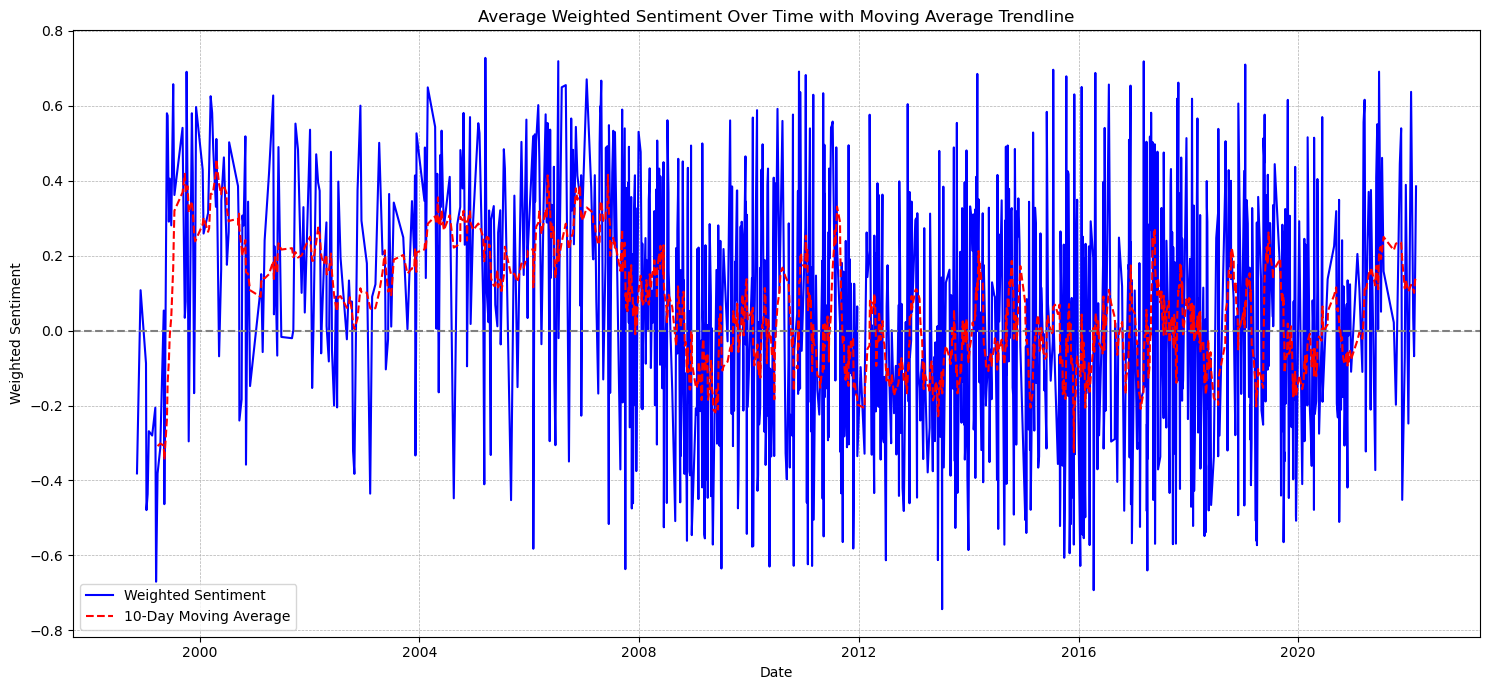

In [6]:
# Plotting the weighted probability and the moving average
plt.figure(figsize=(15,7))
plt.plot(gen_data['Date'], gen_data['weighted_prob'], label='Weighted Sentiment', color='blue')
plt.plot(gen_data['Date'], gen_data['moving_avg_sentiment'], "r--", label=f'{window_size}-Day Moving Average')
plt.axhline(y=0, color='grey', linestyle='--')  
plt.title('Average Weighted Sentiment Over Time with Moving Average Trendline')
plt.xlabel('Date')
plt.ylabel('Weighted Sentiment')
plt.legend()
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Bring other time series variables

In [7]:
import yfinance as yf
import pandas as pd

# Define the path to data file
data_path = "src/Data/stoxx.txt"

# Read the data file into a DataFrame
vstoxx_df = pd.read_csv(data_path, delimiter=";", parse_dates=["Date"], dayfirst=True)

# Change the date format to DD-MM-YYYY
vstoxx_df["Date_merge"] = vstoxx_df["Date"].dt.strftime("%d-%m-%Y")

# generate day of the week column
vstoxx_df['day_of_week'] = pd.to_datetime(vstoxx_df['Date']).dt.day_name()

# generate month column
vstoxx_df['month'] = pd.to_datetime(vstoxx_df['Date']).dt.month_name()

# Create lag variables
vstoxx_df['vstoxx_lag_1'] = vstoxx_df['Indexvalue'].shift(1)
vstoxx_df['vstoxx_lag_2'] = vstoxx_df['Indexvalue'].shift(2)
vstoxx_df['vstoxx_lag_3'] = vstoxx_df['Indexvalue'].shift(3)
vstoxx_df['vstoxx_lag_4'] = vstoxx_df['Indexvalue'].shift(4)
vstoxx_df['vstoxx_lag_5'] = vstoxx_df['Indexvalue'].shift(5)

# Create moving averages
vstoxx_df['vstoxx_ma_7'] = vstoxx_df['Indexvalue'].rolling(window=7).mean()
vstoxx_df['vstoxx_ma_30'] = vstoxx_df['Indexvalue'].rolling(window=30).mean()

# Create delta variables
vstoxx_df['vstoxx_delta_1'] = vstoxx_df['Indexvalue'].diff(1)
vstoxx_df['vstoxx_delta_2'] = vstoxx_df['Indexvalue'].diff(2)
vstoxx_df['vstoxx_delta_3'] = vstoxx_df['Indexvalue'].diff(3)

# Bond price data

In [8]:
# import the bond data
bond_data = pd.read_csv("src/Data/10_year_maturity.csv")

# change variable names to Date and 10_y_bond_yield
bond_data.columns = ['Date', 'Date_2', '10_y_bond_yield']

# delta 1
bond_data['10_y_bond_delta_1'] = bond_data['10_y_bond_yield'].diff(1)

# moving average of last 10 days
bond_data['10_y_bond_ma_10'] = bond_data['10_y_bond_yield'].rolling(window=10).mean()

# drop the second date column
bond_data = bond_data.drop(columns=['Date_2'])
bond_data['Date'] = pd.to_datetime(bond_data['Date'])
bond_data

,Date,10_y_bond_yield,10_y_bond_delta_1,10_y_bond_ma_10
0,2004-09-06,4.209220,NaN,NaN
1,2004-09-07,4.209626,0.000406,NaN
2,2004-09-08,4.228419,0.018793,NaN
3,2004-09-09,4.161872,-0.066547,NaN
4,2004-09-10,4.120981,-0.040891,NaN
...,...,...,...,...
4867,2023-09-15,2.734948,0.050649,2.690594
4868,2023-09-18,2.788173,0.053225,2.705558
4869,2023-09-19,2.807675,0.019502,2.719518
4870,2023-09-20,2.765770,-0.041905,2.728258


In [9]:
# import the yield curve data
yield_curve = pd.read_csv("src/Data/euro_yield_curve.csv")

# Select only 'date' and 's1' columns
yield_curve = yield_curve[['date', 's1']]

# Rename the 's1' column to 's1_yield'
yield_curve.rename(columns={'s1': 'euro_yield'}, inplace=True)
yield_curve.rename(columns={'date': 'Date'}, inplace=True)

# delta 1
yield_curve['euro_yield_delta_1'] = yield_curve['euro_yield'].diff(1)

# lag 1
yield_curve['euro_yield_lag_1'] = yield_curve['euro_yield'].shift(1)

# moving average of last 10 days
yield_curve['euro_yield_ma_10'] = yield_curve['euro_yield'].rolling(window=10).mean()

yield_curve 

,Date,euro_yield,euro_yield_delta_1,euro_yield_lag_1,euro_yield_ma_10
0,2004-09-06,3.298175,NaN,NaN,NaN
1,2004-09-07,3.338711,0.040536,3.298175,NaN
2,2004-09-08,3.375993,0.037282,3.338711,NaN
3,2004-09-09,3.284360,-0.091633,3.375993,NaN
4,2004-09-10,3.208441,-0.075919,3.284360,NaN
...,...,...,...,...,...
4843,2023-08-14,2.370727,0.040967,2.329760,2.297317
4844,2023-08-15,2.448853,0.078126,2.370727,2.308941
4845,2023-08-16,2.428063,-0.020790,2.448853,2.325633
4846,2023-08-17,2.466451,0.038388,2.428063,2.346134


In [10]:
# import the data
ref_rate = pd.read_csv("src/Data/main_ref_rate.csv")

# keep only date and s10
ref_rate = ref_rate[['date', 's12']]

# input the last value to the NaNs
ref_rate['s12'] = ref_rate['s12'].fillna(method='ffill')

# rename the columns
ref_rate.rename(columns={'s12': 'main_ref_rate'}, inplace=True)

# remove the NaNs
ref_rate = ref_rate.dropna()

# transform 1998-12-31 24:00:00 to 1999-01-01 00:00:00 format in date column
ref_rate['Date'] = ref_rate['date'].str.replace(' 24:00:00', ' 00:00:00')

# convert date to datetime format
ref_rate['Date'] = pd.to_datetime(ref_rate['Date'])

# drop the date column
ref_rate.drop(columns=['date'], inplace=True)

# display the data
ref_rate


,main_ref_rate,Date
0,3.00,1998-12-31
1,3.00,1999-01-01
2,3.00,1999-01-02
3,3.00,1999-01-03
4,3.00,1999-01-04
...,...,...
9005,4.25,2023-08-27
9006,4.25,2023-08-28
9007,4.25,2023-08-29
9008,4.25,2023-08-30


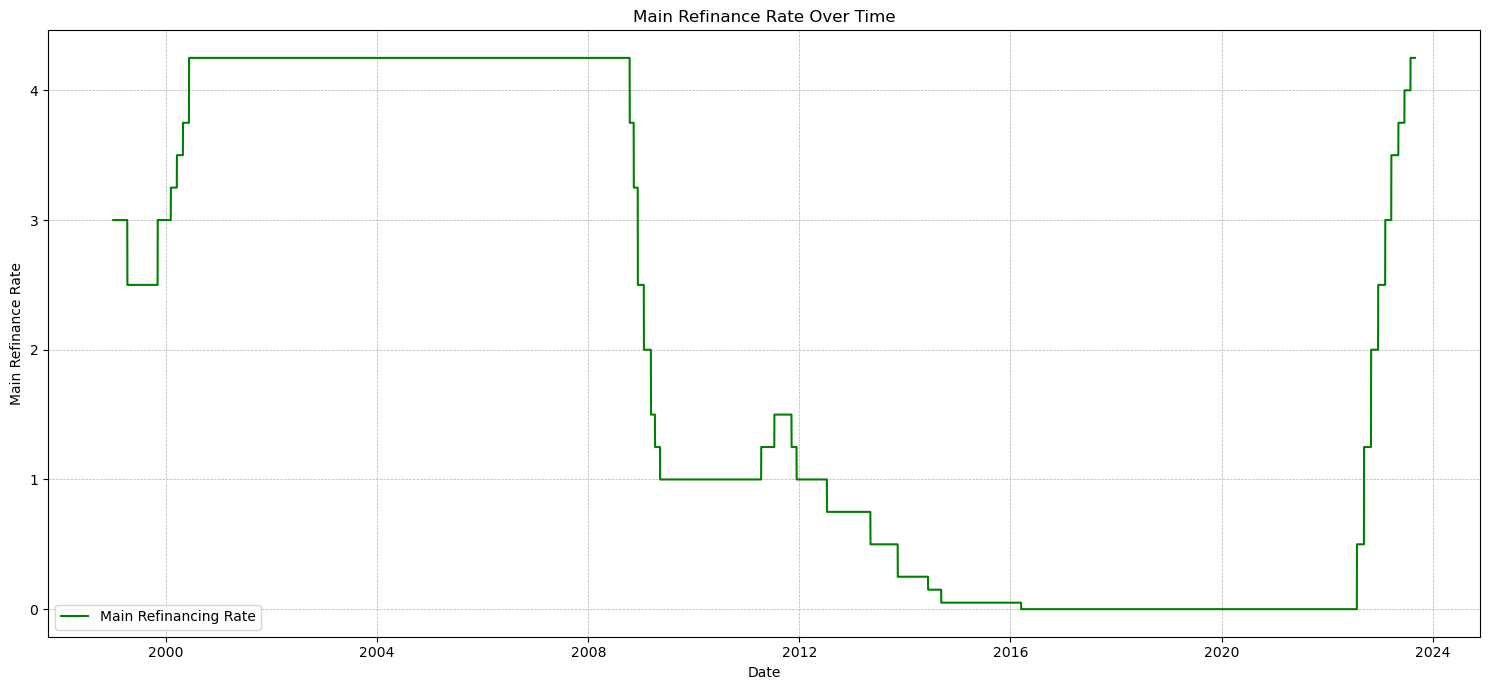

In [11]:
# plot the main refinancing rate over time
plt.figure(figsize=(15,7))
plt.plot(ref_rate['Date'], ref_rate['main_ref_rate'], label='Main Refinancing Rate', color='green')
plt.title('Main Refinance Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Main Refinance Rate')
plt.legend()
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# Labor and unemployment data

In [12]:
# import and transform the data for labor productivity
labor = pd.read_csv("src/Data/Labor_productivity.csv")

# import and transform the data for unemployment
unemployment = pd.read_csv("src/Data/Unemployment.csv")

In [13]:
unemployment

,date,conf,status1,s1
0,2000-01-30 24:00:00,NaN,Normal value,9.44
1,2000-02-28 24:00:00,NaN,Normal value,9.35
2,2000-03-30 24:00:00,NaN,Normal value,9.26
3,2000-04-29 24:00:00,NaN,Normal value,9.18
4,2000-05-30 24:00:00,NaN,Normal value,9.12
...,...,...,...,...
277,2023-02-27 24:00:00,NaN,Normal value,6.59
278,2023-03-30 24:00:00,NaN,Normal value,6.52
279,2023-04-29 24:00:00,NaN,Normal value,6.45
280,2023-05-30 24:00:00,NaN,Normal value,6.40


In [14]:
# Adjust the time and increment the date
def adjust_time(date_string):
    """
    Adjusts the time in a given date string. If the time is '24:00:00', it sets the time to '00:00:00' 
    and increments the date by one day. Otherwise, it returns the date part of the date string.

    Parameters:
    - date_string (str): A string representation of a date and time in the format 'YYYY-MM-DD HH:MM:SS'.

    Returns:
    - datetime.date: A date object representing the adjusted date.
    """
    if '24:00:00' in date_string:
        date_string = date_string.replace('24:00:00', '00:00:00')
        date_object = pd.to_datetime(date_string) + pd.Timedelta(days=1)
        return date_object.date()
    else:
        return pd.to_datetime(date_string).date()

labor['Date'] = labor['date'].apply(adjust_time)
unemployment['Date'] = unemployment['date'].apply(adjust_time)

In [15]:
import pandas as pd

# Merge the dataframes using an outer join
labor_unemployment = pd.merge(labor[['Date', 's1']], 
                              unemployment[['date', 's1']], 
                              left_on='Date', 
                              right_on='date', 
                              how='outer', 
                              suffixes=('_labor', '_unemployment'))

# Drop redundant date column
labor_unemployment.drop(columns=['Date'], inplace=True)

# Rename columns for clarity
labor_unemployment.rename(columns={
    'date': 'Date',
    's1_labor': 'labor_prod_s1', 
    's1_unemployment': 'unemployment_s1'
}, inplace=True)

# Handle missing values by forward filling
labor_unemployment['labor_prod_s1'] = labor_unemployment['labor_prod_s1'].fillna(method='ffill')
labor_unemployment['unemployment_s1'] = labor_unemployment['unemployment_s1'].fillna(method='ffill')

# Display the merged dataframe
labor_unemployment

,labor_prod_s1,Date,unemployment_s1
0,0.22,NaN,NaN
1,0.38,NaN,NaN
2,1.01,NaN,NaN
3,2.01,NaN,NaN
4,1.96,NaN,NaN
...,...,...,...
375,-0.77,2023-02-27 24:00:00,6.59
376,-0.77,2023-03-30 24:00:00,6.52
377,-0.77,2023-04-29 24:00:00,6.45
378,-0.77,2023-05-30 24:00:00,6.40


# Dax data

In [16]:
# import the data
dax_selected = pd.read_csv("src/Data/^GDAXI.csv")

# keep only date, close and volume
dax_selected = dax_selected[['Date', 'Close', 'Volume']]
dax_selected.rename(columns={'Close': 'Close_dax', 'Volume':'Volume_dax'}, inplace=True)

# dax delta 1
dax_selected['dax_delta_1'] = dax_selected['Close_dax'].diff(1)

# dax lag 1
dax_selected['dax_lag_1'] = dax_selected['Close_dax'].shift(1)

# dax moving average of last 10 days
dax_selected['dax_ma_10'] = dax_selected['Close_dax'].rolling(window=10).mean()

dax_selected

,Date,Close_dax,Volume_dax,dax_delta_1,dax_lag_1,dax_ma_10
0,2000-01-03,6750.759766,43072500.0,NaN,NaN,NaN
1,2000-01-04,6586.950195,46678400.0,-163.809571,6750.759766,NaN
2,2000-01-05,6502.069824,52682800.0,-84.880371,6586.950195,NaN
3,2000-01-06,6474.919922,41180600.0,-27.149902,6502.069824,NaN
4,2000-01-07,6780.959961,56058900.0,306.040039,6474.919922,NaN
...,...,...,...,...,...,...
6064,2023-09-18,15727.120117,58899600.0,-166.410156,15893.530273,15756.853125
6065,2023-09-19,15664.480469,53581800.0,-62.639648,15727.120117,15746.130176
6066,2023-09-20,15781.589844,54733100.0,117.109375,15664.480469,15750.152148
6067,2023-09-21,15571.860352,65995100.0,-209.729492,15781.589844,15735.472168


In [17]:
# import volatility data
volatility = pd.read_csv("src/Data/^EVZ volatility.csv")

# keep only date and close
volatility = volatility[['Date', 'Close']]

# rename close to close_volatility
volatility.rename(columns={'Close': 'Close_volatility'}, inplace=True)

# volatility delta 1
volatility['volatility_delta_1'] = volatility['Close_volatility'].diff(1)

# volatility lag 1
volatility['volatility_lag_1'] = volatility['Close_volatility'].shift(1)

# volatility moving average of last 10 days
volatility['volatility_ma_10'] = volatility['Close_volatility'].rolling(window=10).mean()

volatility

,Date,Close_volatility,volatility_delta_1,volatility_lag_1,volatility_ma_10
0,2008-09-25,14.420000,NaN,NaN,NaN
1,2008-09-26,14.990000,0.570000,14.420000,NaN
2,2008-09-29,15.320000,0.330000,14.990000,NaN
3,2008-09-30,18.719999,3.399999,15.320000,NaN
4,2008-10-01,17.280001,-1.439998,18.719999,NaN
...,...,...,...,...,...
3769,2023-09-18,6.750000,-0.170000,6.920000,7.213
3770,2023-09-19,6.920000,0.170000,6.750000,7.147
3771,2023-09-20,6.800000,-0.120000,6.920000,7.067
3772,2023-09-21,7.250000,0.450000,6.800000,7.032


# Merge all of them into one


In [18]:
# select the dataframes to be merged
dfs = [gen_data, vstoxx_df, bond_data, yield_curve, ref_rate, labor_unemployment, dax_selected, volatility]

# Ensure 'Date' columns of all dataframes are corrected and of type datetime64[ns]
for df in dfs:
    # Convert 'Date' column to string for string operations
    df['Date'] = df['Date'].astype(str)
    
    # Replace '24:00:00' with '00:00:00' and add a day
    mask = df['Date'].str.contains('24:00:00', na=False)
    df.loc[mask, 'Date'] = pd.to_datetime(df['Date'].str.replace('24:00:00', '00:00:00')) + pd.Timedelta(days=1)
    
    # Convert to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

# Initialize 'merged_df' with the first dataframe
merged_df = dfs[0].copy()

# Iteratively merge the other dataframes
for i, df in enumerate(dfs[1:], 2):  # Start enumeration at 2 for suffix purposes
    # Find overlapping columns (other than 'Date')
    overlapping_columns = df.columns[df.columns.isin(merged_df.columns) & (df.columns != 'Date')]
    
    # For overlapping columns in the next dataframe, add suffixes
    df = df.rename(columns={col: f"{col}_df{i}" for col in overlapping_columns})
    
    # Merge
    merged_df = merged_df.merge(df, on='Date', how='outer')

# Display the merged dataframe
merged_df


,Date,content,negative_counts,neutral_counts,positive_counts,positive_max,positive_min,positive_mean,negative_max,negative_min,...,unemployment_s1,Close_dax,Volume_dax,dax_delta_1,dax_lag_1,dax_ma_10,Close_volatility,volatility_delta_1,volatility_lag_1,volatility_ma_10
0,1998-11-09,Mr. Duisenberg’s opening statement at the pres...,6.0,13.0,2.0,0.899266,0.765561,0.832413,0.962060,0.523458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-12-03,Mr Duisenberg reports on the current position ...,2.0,14.0,3.0,0.808924,0.565346,0.677796,0.847879,0.645703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-01-08,Mr Duisenberg’s opening statement at the press...,2.0,18.0,2.0,0.923603,0.554621,0.739112,0.947072,0.880715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-01-11,Mr Duisenberg’s opening statement at the press...,10.0,23.0,2.0,0.817296,0.668759,0.743027,0.954375,0.496729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-01-19,Mr Duisenberg’s opening statement at the Europ...,6.0,16.0,2.0,0.870406,0.866672,0.868539,0.968294,0.739333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9122,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9123,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9124,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
merged_df.columns.tolist()


['Date',
 'content',
 'negative_counts',
 'neutral_counts',
 'positive_counts',
 'positive_max',
 'positive_min',
 'positive_mean',
 'negative_max',
 'negative_min',
 'negative_mean',
 'neutral_max',
 'neutral_min',
 'neutral_mean',
 'weighted_prob',
 'moving_avg_sentiment',
 'Symbol',
 'Indexvalue',
 'Date_merge',
 'day_of_week',
 'month',
 'vstoxx_lag_1',
 'vstoxx_lag_2',
 'vstoxx_lag_3',
 'vstoxx_lag_4',
 'vstoxx_lag_5',
 'vstoxx_ma_7',
 'vstoxx_ma_30',
 'vstoxx_delta_1',
 'vstoxx_delta_2',
 'vstoxx_delta_3',
 '10_y_bond_yield',
 '10_y_bond_delta_1',
 '10_y_bond_ma_10',
 'euro_yield',
 'euro_yield_delta_1',
 'euro_yield_lag_1',
 'euro_yield_ma_10',
 'main_ref_rate',
 'labor_prod_s1',
 'unemployment_s1',
 'Close_dax',
 'Volume_dax',
 'dax_delta_1',
 'dax_lag_1',
 'dax_ma_10',
 'Close_volatility',
 'volatility_delta_1',
 'volatility_lag_1',
 'volatility_ma_10']

In [20]:
# Count NaN and null values for each column
nan_counts = merged_df.isna().sum()

# Convert to DataFrame for better presentation
nan_table = pd.DataFrame(nan_counts, columns=['NaN/Null Count'])

print(nan_table)


                      NaN/Null Count
Date                              98
content                         7874
negative_counts                 7874
neutral_counts                  7874
positive_counts                 7874
positive_max                    7874
positive_min                    7874
positive_mean                   7874
negative_max                    7874
negative_min                    7874
negative_mean                   7874
neutral_max                     7874
neutral_min                     7874
neutral_mean                    7874
weighted_prob                   7874
moving_avg_sentiment            7883
Symbol                          2853
Indexvalue                      2853
Date_merge                      2853
day_of_week                     2853
month                           2853
vstoxx_lag_1                    2854
vstoxx_lag_2                    2855
vstoxx_lag_3                    2856
vstoxx_lag_4                    2857
vstoxx_lag_5                    2858
v

In [21]:
# Filter the rows based on the 'Date' column
merged_df = merged_df[merged_df['Date'] > '2005-01-01']

# filter and keep only where weighted_prob	exists
merged_df = merged_df[merged_df['weighted_prob'].notna()]

# Count NaN and null values for each column
nan_counts = merged_df.isna().sum()

# Convert to DataFrame for better presentation
nan_table = pd.DataFrame(nan_counts, columns=['NaN/Null Count'])

nan_table


,NaN/Null Count
Date,0
content,0
negative_counts,0
neutral_counts,0
positive_counts,0
positive_max,0
positive_min,0
positive_mean,0
negative_max,0
negative_min,0


In [22]:
# display dataframe with all the columns 
pd.set_option('display.max_columns', None)
merged_df['labor_prod_s1'] = merged_df['labor_prod_s1'].fillna(method='ffill')
merged_df['unemployment_s1'] = merged_df['unemployment_s1'].fillna(method='ffill')

# for all previous rows of labor and unemployment, fill NaNs with 0
merged_df['labor_prod_s1'] = merged_df['labor_prod_s1'].fillna(0)
merged_df['unemployment_s1'] = merged_df['unemployment_s1'].fillna(0)

# fill NaNs with its previous value in Close_volatility column
merged_df['Close_volatility'] = merged_df['Close_volatility'].fillna(method='ffill')
# fill initial NaNs with 0
merged_df['Close_volatility'] = merged_df['Close_volatility'].fillna(0)

merged_df

,Date,content,negative_counts,neutral_counts,positive_counts,positive_max,positive_min,positive_mean,negative_max,negative_min,negative_mean,neutral_max,neutral_min,neutral_mean,weighted_prob,moving_avg_sentiment,Symbol,Indexvalue,Date_merge,day_of_week,month,vstoxx_lag_1,vstoxx_lag_2,vstoxx_lag_3,vstoxx_lag_4,vstoxx_lag_5,vstoxx_ma_7,vstoxx_ma_30,vstoxx_delta_1,vstoxx_delta_2,vstoxx_delta_3,10_y_bond_yield,10_y_bond_delta_1,10_y_bond_ma_10,euro_yield,euro_yield_delta_1,euro_yield_lag_1,euro_yield_ma_10,main_ref_rate,labor_prod_s1,unemployment_s1,Close_dax,Volume_dax,dax_delta_1,dax_lag_1,dax_ma_10,Close_volatility,volatility_delta_1,volatility_lag_1,volatility_ma_10
159,2005-01-26,Jean-Claude Trichet: The euro - successes and ...,1.0,10.0,8.0,0.882642,0.466327,0.687462,0.515659,0.515659,0.515659,0.927084,0.479027,0.698223,0.553782,0.285913,V2TX,13.3240,26-01-2005,Wednesday,January,13.6280,14.1144,13.9613,14.1740,13.6336,13.714586,13.702397,-0.3040,-0.7904,-0.6373,3.573076,0.040728,3.566470,2.802277,0.049947,2.752330,2.778471,4.25,0.00,0.00,4214.120117,141212200.0,-19.830078,4233.950195,4227.036035,0.00,NaN,NaN,NaN
160,2005-02-03,Jean-Claude Trichet: Interview with Les Echos ...,1.0,39.0,9.0,0.807713,0.362695,0.646132,0.540062,0.540062,0.540062,0.944788,0.507110,0.804610,0.527512,0.280547,V2TX,12.3844,03-02-2005,Thursday,February,12.2505,12.3571,12.7246,12.8050,12.4620,12.615371,13.420187,0.1339,0.0273,-0.3402,3.554661,0.017255,3.561537,2.841413,0.038382,2.803031,2.799980,4.25,0.00,0.00,4281.640137,96153600.0,-14.669922,4296.310059,4239.465137,0.00,NaN,NaN,NaN
161,2005-02-28,Jean-Claude Trichet: Monetary policy and priva...,4.0,33.0,5.0,0.794457,0.461968,0.668889,0.808487,0.560649,0.681837,0.940553,0.521477,0.827575,0.068567,0.249022,V2TX,12.8907,28-02-2005,Monday,February,12.2107,13.1899,13.9910,13.4859,13.2379,13.145800,12.894647,0.6800,-0.2992,-1.1003,3.710944,-0.025771,3.644908,2.970440,-0.021502,2.991942,2.922296,4.25,-0.77,9.29,4350.490234,110897300.0,1.850097,4348.640137,4349.058057,0.00,NaN,NaN,NaN
162,2005-03-07,European Central Bank: Press conference - intr...,5.0,4.0,2.0,0.740040,0.507554,0.623797,0.973803,0.643690,0.823827,0.768903,0.595795,0.651477,-0.410220,0.185070,V2TX,11.7178,07-03-2005,Monday,March,11.9310,12.5722,12.8591,12.3502,12.8907,12.361671,12.640653,-0.2132,-0.8544,-1.1413,3.681450,-0.040379,3.722723,2.862540,-0.038550,2.901090,2.949125,4.25,-0.77,9.29,4428.089844,81185200.0,4.569824,4423.520020,4363.922070,0.00,NaN,NaN,NaN
163,2005-03-14,Jean-Claude Trichet: Economic and financial in...,1.0,22.0,14.0,0.952844,0.511849,0.819305,0.547662,0.547662,0.547662,0.926835,0.487195,0.756132,0.728174,0.230004,V2TX,13.3498,14-03-2005,Monday,March,12.9566,13.4730,12.5319,12.0020,11.7178,12.566014,12.619643,0.3932,-0.1232,0.8179,3.794177,0.007082,3.754511,2.946157,0.027809,2.918348,2.930292,4.25,-0.77,9.29,4367.299805,69258200.0,6.809571,4360.490234,4383.950049,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2022-01-21,Christine Lagarde: Introductory statement at t...,1.0,7.0,10.0,0.953582,0.613189,0.747925,0.466378,0.466378,0.466378,0.839482,0.542453,0.744504,0.637534,0.122252,V2TX,24.2217,21-01-2022,Friday,January,20.4033,22.3578,21.9614,20.0374,21.3963,21.262686,21.146813,3.8184,1.8639,2.2603,-0.079525,-0.038019,-0.053878,-0.500242,-0.063412,-0.436830,-0.464595,0.00,-0.77,8.56,15603.879883,105899500.0,-308.450195,15912.330078,15866.743848,5.92,0.05,5.87,5.711
1248,2022-02-04,Christine Lagarde: Introductory statement at E...,4.0,1.0,4.0,0.954398,0.446699,0.824757,0.943139,0.491753,0.756767,0.539072,0.539072,0.539072,0.033995,0.109810,V2TX,26.3008,04-02-2022,Friday,February,24.3287,22.6402,24.0892,27.0084,29.4111,25.972343,22.575127,1.9721,3.6606,2.2116,0.195480,0.060854,0.010750,0.044753,0.188640,-0.143887,-0.359217,0.00,-0.77,8.56,15099.

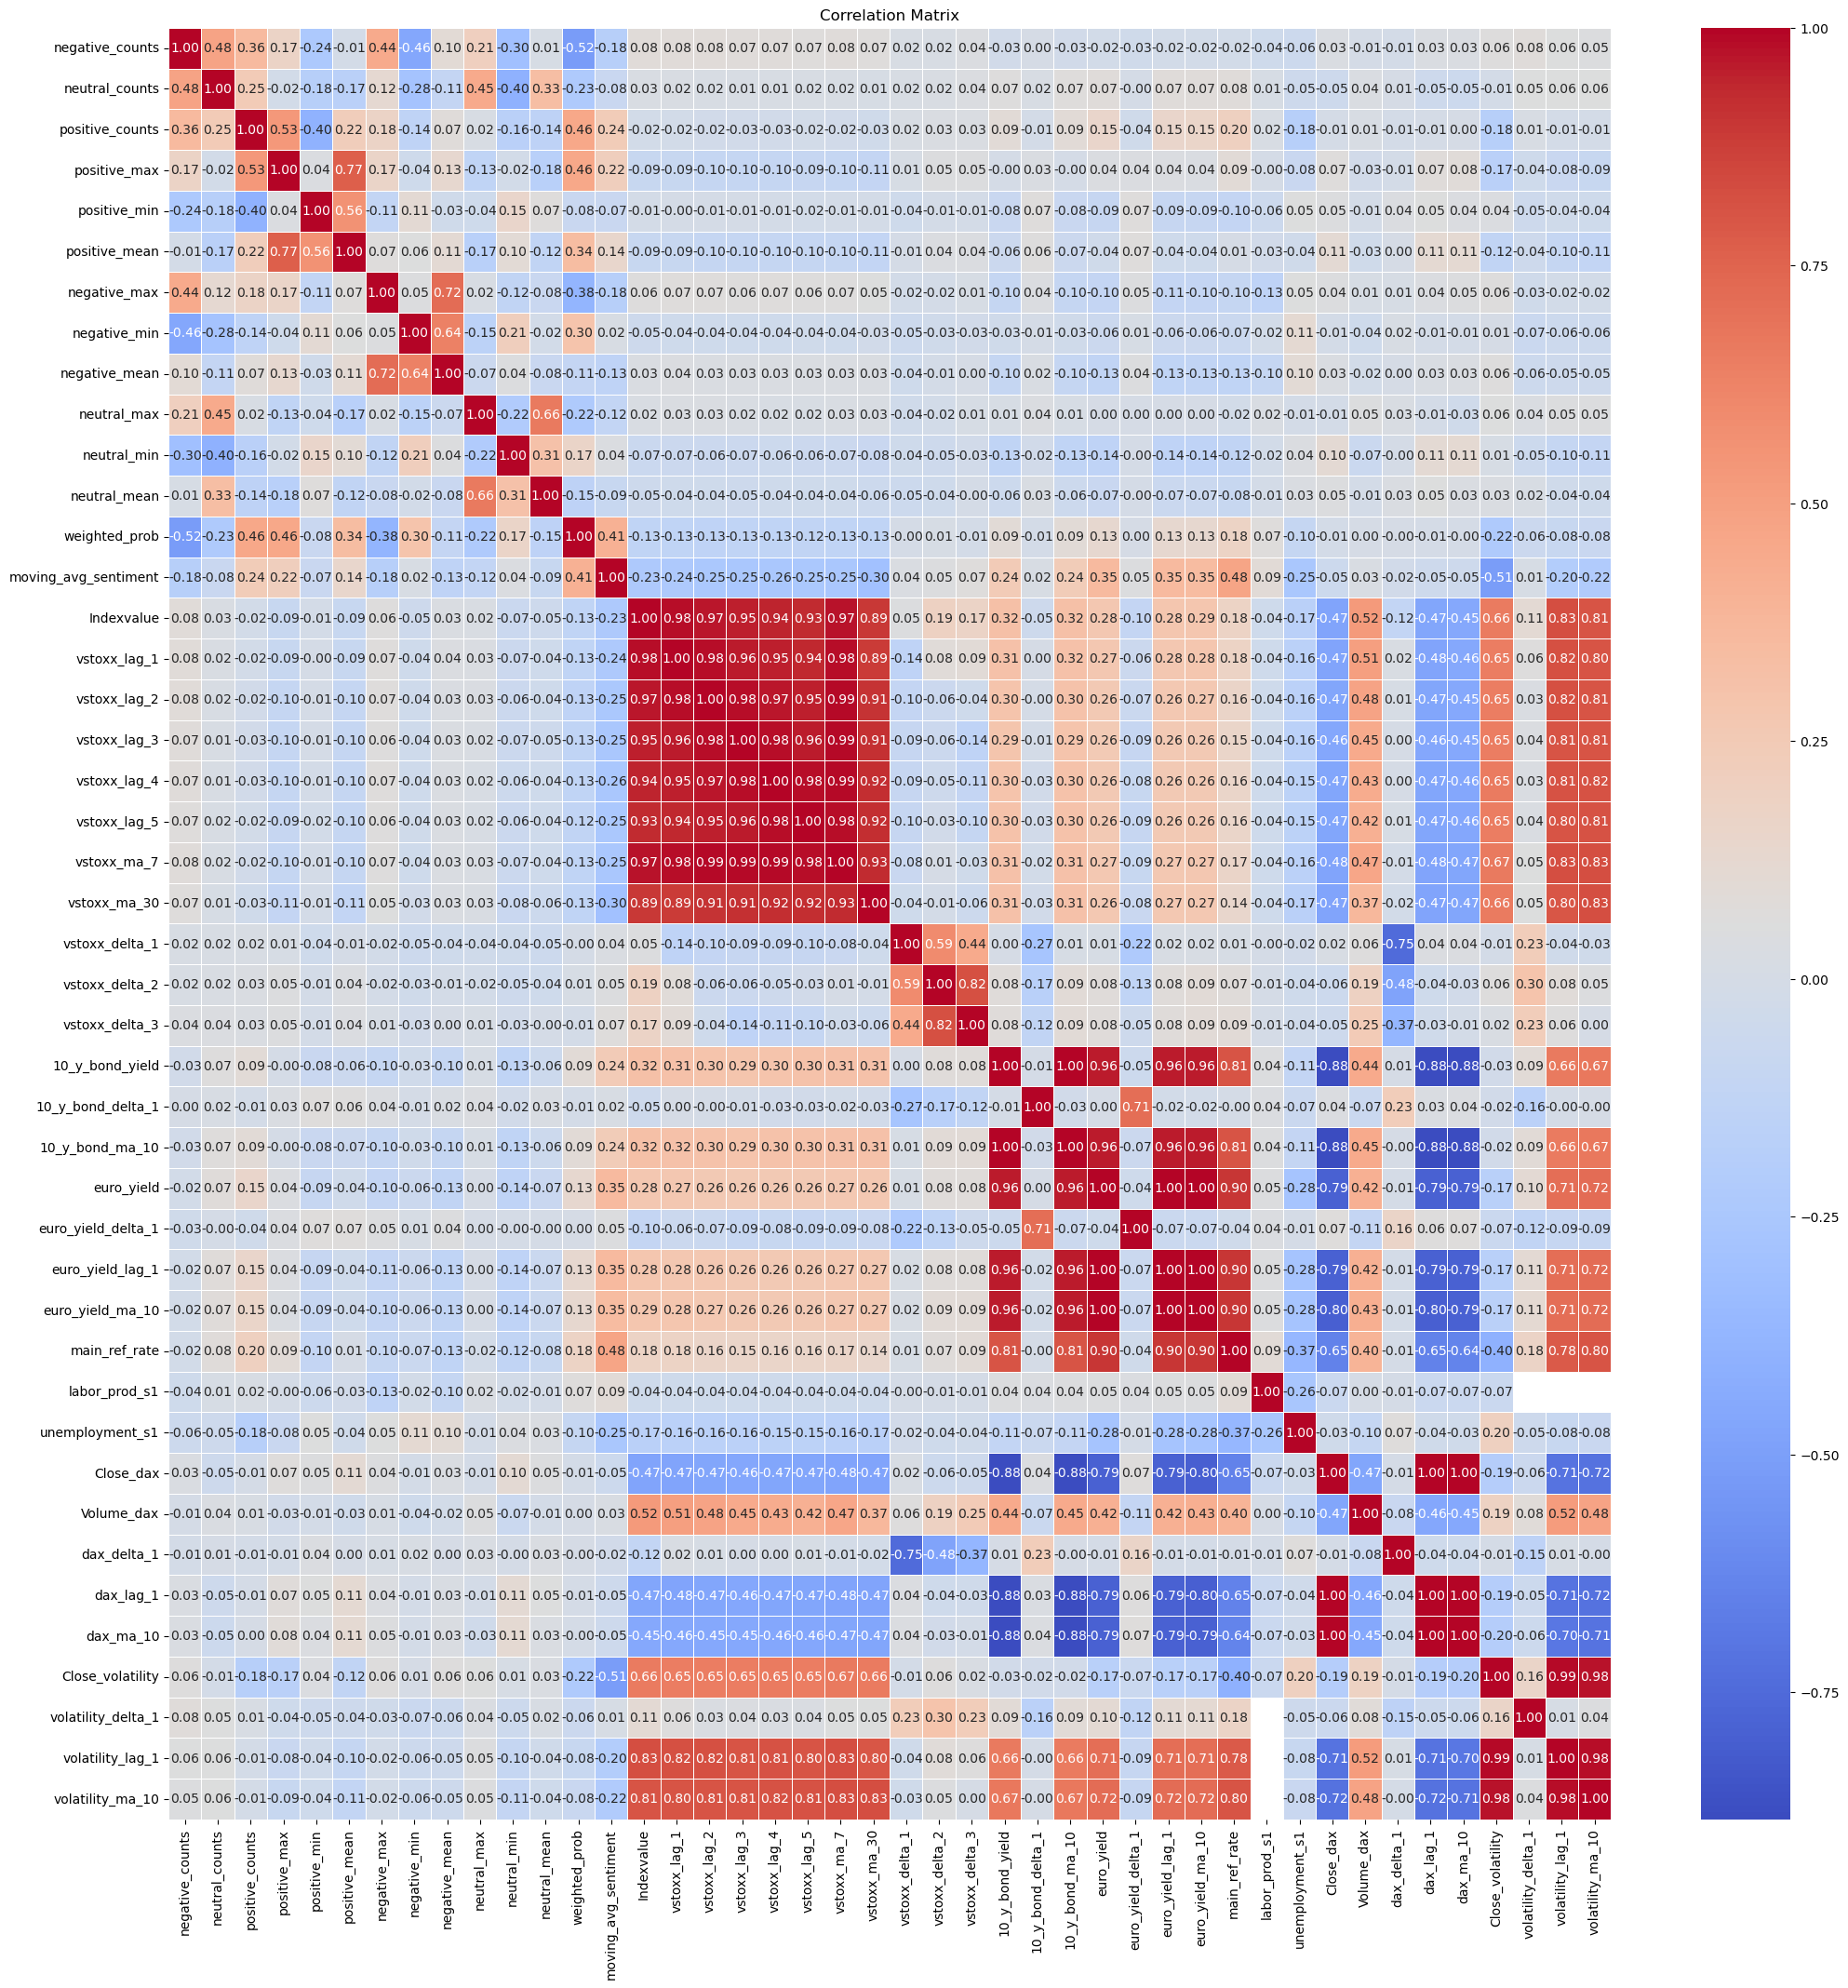

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only numeric columns
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [24]:
# save the merged dataframe
merged_df.to_csv("src/Output/merged_df.csv")

# Preparing Model I and Model II

The primary objective of this study is to assess the relevance and predictive power of the speech sentiments in certain models, as well as comparing the models themselves between each other. Each model of choice will utilize two models. For simplicity and consistency, we just call them Model I and Model II in this Notebook. 
- Dataset for Model I contains the stock market data, along with other time series data such as labor productivity, inflation, main refinancing rate.
- Dataset for Model II  has everything Model I has, and it also has speech sentiments - that is the market sentiment on the day the date indicating, as well as the moving average market sentiment of N days in the past. We chose N to be 10 in this study. 
- Based on the datasets features_1 and features_2, we will also create the further preprocessed dataframes like scaled_1 and scaled_2 that are the standardized values of the dataframes, since the models are sensitive to scale, and this prevents models from any misbehaving.

# Preparing the features_1 and features_2 datasets
- The process is simple in this case. features_2 dataset is created first, and two of the columns that are not supposed to be included in the models without sentiments will be eliminated from features_2 dataframe to create features_1 dataframe

In [25]:
# import the data
merged_df = pd.read_csv("src/Output/merged_df.csv")

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Extract data 
# Adding the 'weighted_prob' to the model
features_2 = merged_df[['Date','Indexvalue','10_y_bond_delta_1', 'weighted_prob', 
                        'vstoxx_lag_1','vstoxx_ma_7', 'day_of_week', 'main_ref_rate',
                        'moving_avg_sentiment','euro_yield_lag_1','Close_volatility',
                        'dax_delta_1',"dax_lag_1"]]


features_2 = features_2[features_2['day_of_week'].notna()]

# count nans
features_2.isnull().sum()
# reset index
features_2 = features_2.reset_index(drop=True)
features_2

2023-10-02 09:48:04.523125: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-02 09:48:04.933595: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 09:48:07.230948: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 09:48:07.273286: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-02 09:48:13.800737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

,Date,Indexvalue,10_y_bond_delta_1,weighted_prob,vstoxx_lag_1,vstoxx_ma_7,day_of_week,main_ref_rate,moving_avg_sentiment,euro_yield_lag_1,Close_volatility,dax_delta_1,dax_lag_1
0,2005-01-26,13.3240,0.040728,0.553782,13.6280,13.714586,Wednesday,4.25,0.285913,2.752330,0.00,-19.830078,4233.950195
1,2005-02-03,12.3844,0.017255,0.527512,12.2505,12.615371,Thursday,4.25,0.280547,2.803031,0.00,-14.669922,4296.310059
2,2005-02-28,12.8907,-0.025771,0.068567,12.2107,13.145800,Monday,4.25,0.249022,2.991942,0.00,1.850097,4348.640137
3,2005-03-07,11.7178,-0.040379,-0.410220,11.9310,12.361671,Monday,4.25,0.185070,2.901090,0.00,4.569824,4423.520020
4,2005-03-14,13.3498,0.007082,0.728174,12.9566,12.566014,Monday,4.25,0.230004,2.918348,0.00,6.809571,4360.490234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,2022-01-21,24.2217,-0.038019,0.637534,20.4033,21.262686,Friday,0.00,0.122252,-0.436830,5.92,-308.450195,15912.330078
1087,2022-02-04,26.3008,0.060854,0.033995,24.3287,25.972343,Friday,0.00,0.109810,-0.143887,6.81,-268.910157,15368.469727
1088,2022-02-10,21.8414,0.031369,-0.068289,21.4117,23.417500,Thursday,0.00,0.100805,-0.024448,7.15,8.430664,15482.009766
1089,2022-02-17,28.7931,-0.028350,0.159978,26.6138,25.776200,Thursday,0.00,0.136591,-0.041497,7.57,-128.440430,15396.070313


In [27]:
def summary_statistics_to_latex(df):
    """
    Generate summary statistics for all numeric variables in a dataframe
    and return the statistics in LaTeX table format.

    Parameters:
    - df: DataFrame

    Returns:
    - String containing the LaTeX table representation of the summary statistics
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Generate summary statistics
    summary = numeric_df.describe().transpose()
    
    # truncate the columns to 3 decimal places
    summary = summary.round(3)

    # Convert to LaTeX format
    latex_table = summary.to_latex()
    
    return latex_table

print(summary_statistics_to_latex(features_2))



\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
Indexvalue & 1091.000000 & 22.974000 & 9.905000 & 10.902000 & 16.336000 & 20.623000 & 26.258000 & 78.346000 \\
10_y_bond_delta_1 & 1091.000000 & -0.002000 & 0.037000 & -0.140000 & -0.024000 & -0.002000 & 0.019000 & 0.161000 \\
weighted_prob & 1091.000000 & 0.018000 & 0.322000 & -0.744000 & -0.222000 & 0.017000 & 0.266000 & 0.728000 \\
vstoxx_lag_1 & 1091.000000 & 22.971000 & 9.991000 & 10.678000 & 16.380000 & 20.662000 & 26.205000 & 87.513000 \\
vstoxx_ma_7 & 1091.000000 & 22.957000 & 9.675000 & 11.330000 & 16.439000 & 20.897000 & 26.107000 & 76.143000 \\
main_ref_rate & 1091.000000 & 1.096000 & 1.513000 & 0.000000 & 0.000000 & 0.500000 & 1.250000 & 4.250000 \\
moving_avg_sentiment & 1091.000000 & 0.019000 & 0.128000 & -0.324000 & -0.079000 & 0.002000 & 0.106000 & 0.416000 \\
euro_yield_lag_1 & 1091.000000 & 0.961000 & 1.618000 & -0.990000 & -0.491000 & 0.380000 & 2.414000 & 4.851000 \\


In [28]:
# store the dates for later visualization 
dates_series = features_2['Date']

# fill the euro_yield_1_day with mean of its previous and next values
features_2['10_y_bond_delta_1'] = features_2['10_y_bond_delta_1'].fillna(method='ffill')

# fill dax_delta_1 with ffill method
features_2['dax_delta_1'] = features_2['dax_delta_1'].fillna(method='ffill')

# fill dax_ma_10 with ffill method
# features_2['dax_ma_10'] = features_2['dax_ma_10'].fillna(method='ffill')

# fill dax_lag_1 with ffill method
features_2['dax_lag_1'] = features_2['dax_lag_1'].fillna(method='ffill')

# make sure there are no nan values
features_2.isnull().sum()


Date                    0
Indexvalue              0
10_y_bond_delta_1       0
weighted_prob           0
vstoxx_lag_1            0
vstoxx_ma_7             0
day_of_week             0
main_ref_rate           0
moving_avg_sentiment    0
euro_yield_lag_1        0
Close_volatility        0
dax_delta_1             0
dax_lag_1               0
dtype: int64

In [29]:
# 1. Handle the 'day_of_week' feature if it exists in the DataFrame
if 'day_of_week' in features_2.columns:
    dummies = pd.get_dummies(features_2['day_of_week'], drop_first=True)  # drop_first avoids multicollinearity
    features_2 = features_2.drop('day_of_week', axis=1)
    features_2 = pd.concat([features_2, dummies], axis=1)

In [30]:
# 2. Scale the data but exclude the 'Date' column

features_without_date_2 = features_2.drop(columns=['Date'])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_without_date_2 = scaler.fit_transform(features_without_date_2)

In [31]:
# Convert the scaled data back to a DataFrame and re-add the 'Date' column
scaled2_df = pd.DataFrame(scaled_data_without_date_2, columns=features_without_date_2.columns)
scaled2_df['Date'] = dates_series.reset_index(drop=True)


In [32]:
scaled2_df

,Indexvalue,10_y_bond_delta_1,weighted_prob,vstoxx_lag_1,vstoxx_ma_7,main_ref_rate,moving_avg_sentiment,euro_yield_lag_1,Close_volatility,dax_delta_1,dax_lag_1,Monday,Thursday,Tuesday,Wednesday,Date
0,0.035906,0.600374,0.881511,0.038390,0.036785,1.0,0.824089,0.640764,0.000000,0.493211,0.045468,0.0,0.0,0.0,1.0,2005-01-26
1,0.021974,0.522221,0.863662,0.020462,0.019825,1.0,0.816841,0.649444,0.000000,0.497805,0.050464,0.0,1.0,0.0,0.0,2005-02-03
2,0.029481,0.378967,0.551835,0.019944,0.028009,1.0,0.774259,0.681788,0.000000,0.512513,0.054656,1.0,0.0,0.0,0.0,2005-02-28
3,0.012090,0.330330,0.226526,0.016304,0.015911,1.0,0.687878,0.666233,0.000000,0.514934,0.060655,1.0,0.0,0.0,0.0,2005-03-07
4,0.036288,0.488350,1.000000,0.029652,0.019063,1.0,0.748571,0.669188,0.000000,0.516928,0.055605,1.0,0.0,0.0,0.0,2005-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0.197488,0.338188,0.938415,0.126571,0.153245,0.0,0.603029,0.094744,0.209706,0.236251,0.981068,0.0,0.0,0.0,0.0,2022-01-21
1087,0.228315,0.667383,0.528345,0.177660,0.225911,0.0,0.586222,0.144899,0.241233,0.271454,0.937498,0.0,0.0,0.0,0.0,2022-02-04
1088,0.162195,0.569213,0.458849,0.139695,0.186492,0.0,0.574059,0.165348,0.253277,0.518372,0.946594,0.0,1.0,0.0,0.0,2022-02-10
1089,0.265269,0.370380,0.613944,0.207401,0.222885,0.0,0.622397,0.162429,0.268154,0.396515,0.939709,0.0,1.0,0.0,0.0,2022-02-17


In [33]:
# eliminate the 'moving_avg_sentiment_1_day' and weighted_prob columns to create scaled1_df
scaled1_df = scaled2_df.drop(columns=['moving_avg_sentiment', 'weighted_prob'])

In [34]:
# display the new dataset
scaled1_df

,Indexvalue,10_y_bond_delta_1,vstoxx_lag_1,vstoxx_ma_7,main_ref_rate,euro_yield_lag_1,Close_volatility,dax_delta_1,dax_lag_1,Monday,Thursday,Tuesday,Wednesday,Date
0,0.035906,0.600374,0.038390,0.036785,1.0,0.640764,0.000000,0.493211,0.045468,0.0,0.0,0.0,1.0,2005-01-26
1,0.021974,0.522221,0.020462,0.019825,1.0,0.649444,0.000000,0.497805,0.050464,0.0,1.0,0.0,0.0,2005-02-03
2,0.029481,0.378967,0.019944,0.028009,1.0,0.681788,0.000000,0.512513,0.054656,1.0,0.0,0.0,0.0,2005-02-28
3,0.012090,0.330330,0.016304,0.015911,1.0,0.666233,0.000000,0.514934,0.060655,1.0,0.0,0.0,0.0,2005-03-07
4,0.036288,0.488350,0.029652,0.019063,1.0,0.669188,0.000000,0.516928,0.055605,1.0,0.0,0.0,0.0,2005-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0.197488,0.338188,0.126571,0.153245,0.0,0.094744,0.209706,0.236251,0.981068,0.0,0.0,0.0,0.0,2022-01-21
1087,0.228315,0.667383,0.177660,0.225911,0.0,0.144899,0.241233,0.271454,0.937498,0.0,0.0,0.0,0.0,2022-02-04
1088,0.162195,0.569213,0.139695,0.186492,0.0,0.165348,0.253277,0.518372,0.946594,0.0,1.0,0.0,0.0,2022-02-10
1089,0.265269,0.370380,0.207401,0.222885,0.0,0.162429,0.268154,0.396515,0.939709,0.0,1.0,0.0,0.0,2022-02-17


In [35]:
# To use scaled_df for LSTM sequences, remove the 'Date' column again
scaled_data_1 = scaled1_df.drop(columns=['Date']).values
scaled_data_2 = scaled2_df.drop(columns=['Date']).values

# Define the sequence length
sequence_length = 30

# Initialize lists to store the X and y data for both models
X_1 = []
y_1 = []
X_2 = []
y_2 = []

for i in range(sequence_length, len(scaled_data_1)):
    X_1.append(scaled_data_1[i-sequence_length:i, 1:])  # All columns except the target, the first column being the outcome variable
    y_1.append(scaled_data_1[i, 0])  # Target column

for i in range(sequence_length, len(scaled_data_2)):
    X_2.append(scaled_data_2[i-sequence_length:i, 1:])  # All columns except the target, the first column being the outcome variable
    y_2.append(scaled_data_2[i, 0])  # Target column

# Adjust the reshaping step to consider all features dynamically
num_features_1 = scaled_data_1.shape[1] - 1  # Subtracting 1 for the target column
num_features_2 = scaled_data_2.shape[1] - 1  # Subtracting 1 for the target column

# Convert the lists to numpy arrays
X_1, y_1, X_2, y_2 = np.array(X_1), np.array(y_1), np.array(X_2), np.array(y_2)

# Reshape the data
X_1 = np.reshape(X_1, (-1, sequence_length, num_features_1))
X_2 = np.reshape(X_2, (-1, sequence_length, num_features_2))

In [36]:
# make sure the number of features is correct
num_features_1, num_features_2

(12, 14)

In [37]:
# Display the shapes of the data
X_1.shape, y_1.shape, X_2.shape, y_2.shape

((1061, 30, 12), (1061,), (1061, 30, 14), (1061,))

In the process of preparing the data for LSTM modeling, sequences suitable for time series forecasting were created. Each sequence was constructed using a specified length of prior data points.

Due to this sequencing method, the initial set of data points (equal to the sequence length) couldn't be used to form complete sequences and were therefore excluded from the final dataset.

With a chosen sequence length of 30, a reduction of 30 data points was observed. Thus, if the original dataset contained 1091 data points, it was reduced to 1061 data points after this step.

In [38]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

import numpy as np
import tensorflow as tf
import random
import os
# 1. Set Python's random seed
random.seed(42)

# 2. Set Numpy's random seed
np.random.seed(42)

# 3. Set TensorFlow's random seed
tf.random.set_seed(42)

# For the use case of GPU set deterministic operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Split data (70% train, 30% test)
train_size = int(0.7 * len(dates_series))

# training and testing data for model 1
X_train_1, X_test_1 = X_1[:train_size], X_1[train_size:]
y_train_1, y_test_1 = y_1[:train_size], y_2[train_size:]

# training and testing data for model 2
X_train_2, X_test_2 = X_2[:train_size], X_2[train_size:]
y_train_2, y_test_2 = y_2[:train_size], y_2[train_size:]

In [39]:
# Display the shapes of the data
X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((763, 30, 12), (298, 30, 12), (763,), (298,))

In [40]:
# Display the shapes of the data
X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape

((763, 30, 14), (298, 30, 14), (763,), (298,))

In [41]:
# save the dates
dates_train = dates_series[:train_size]
dates_test = dates_series[train_size:]
dates_train, dates_test

(0      2005-01-26
 1      2005-02-03
 2      2005-02-28
 3      2005-03-07
 4      2005-03-14
           ...    
 758    2016-07-21
 759    2016-08-05
 760    2016-08-29
 761    2016-09-01
 762    2016-09-15
 Name: Date, Length: 763, dtype: object,
 763     2016-09-26
 764     2016-10-17
 765     2016-10-26
 766     2016-10-31
 767     2016-11-08
            ...    
 1086    2022-01-21
 1087    2022-02-04
 1088    2022-02-10
 1089    2022-02-17
 1090    2022-02-23
 Name: Date, Length: 328, dtype: object)

The above process makes sure that training and test data for the models are built correctly ensuring the number of features, order, time series indicator and outcome variables are stored properly.
 

# Kicking off with models
## LSTM Model I 

In [42]:
# set the optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005, clipnorm=0.9,beta_1 = 0.9, beta_2 = 0.90, epsilon=1e-08, amsgrad=False) 

# Build LSTM model
model_1_LSTM = Sequential()
model_1_LSTM.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, num_features_1)))
model_1_LSTM.add(LSTM(units=50))
model_1_LSTM.add(Dense(units=1))
model_1_LSTM.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Train the model and store its history
history_1_LSTM = model_1_LSTM.fit(X_train_1, y_train_1, epochs=100, batch_size=64, validation_data=(X_test_1, y_test_1))

# Access training and validation loss (can be plotted or analyzed further)
training_loss_1_LSTM = history_1_LSTM.history['loss']
validation_loss_1_LSTM = history_1_LSTM.history['val_loss']

2023-10-02 09:48:28.663803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-02 09:48:28.665112: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
12/12 [==============================] - 9s 107ms/step - loss: 0.0211 - val_loss: 0.0154
Epoch 2/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch 3/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0153 - val_loss: 0.0153
Epoch 4/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0139 - val_loss: 0.0144
Epoch 5/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0127 - val_loss: 0.0141
Epoch 6/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0118 - val_loss: 0.0137
Epoch 7/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0110 - val_loss: 0.0135
Epoch 8/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0103 - val_loss: 0.0132
Epoch 9/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0099 - val_loss: 0.0131
Epoch 10/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0095 - val_loss: 0.013

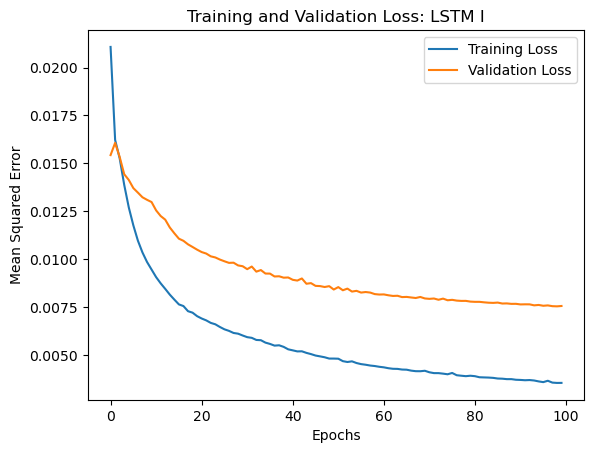

In [185]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(training_loss_1_LSTM, label='Training Loss')
plt.plot(validation_loss_1_LSTM, label='Validation Loss')
plt.title('Training and Validation Loss: LSTM I')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

#save the plot
plt.savefig("src/Output/Plots/Loss_LSTM_I.png")

plt.show()


In [44]:
# Evaluate model
predicted_index_price_1_LSTM = model_1_LSTM.predict(X_test_1)

# for the container to be compatible with the scaler, add the same number of columns as the original data
num_original_features = num_features_1 + 3

# and the same number of columns as the original data
temp_array = np.zeros((predicted_index_price_1_LSTM.shape[0], num_original_features))

# Fill the first column with `predicted_index_price` values
temp_array[:, 0] = predicted_index_price_1_LSTM.ravel()

# Inverse transform this array
inverse_transformed = scaler.inverse_transform(temp_array)

# Extract the index_price predictions from the first column
final_predicted_index_price_1_LSTM = inverse_transformed[:, 0]


10/10 [==============================] - 1s 6ms/step


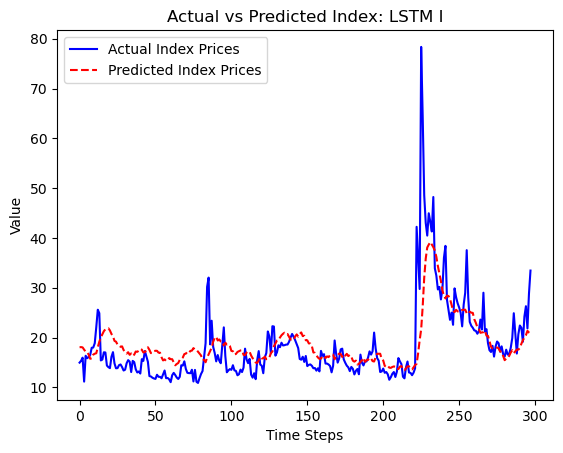

In [206]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Preparing the data for inverse transformation
# ----------------------------------------------

# Convert y_test to a 2D array for compatibility with the transformation process
y_test_2d = y_test_1.reshape(-1, 1)

# Create a placeholder array with adjusted size
placeholder_array = np.zeros((y_test_2d.shape[0], num_features_1 + 3))

# Assign the values from y_test to the first column of this placeholder array.
placeholder_array[:, 0] = y_test_2d.ravel()

# Step 2: Performing the inverse transformation
# ----------------------------------------------
actual_prices = scaler.inverse_transform(placeholder_array)[:, 0]

# Step 3: Plotting the actual vs predicted values
# ----------------------------------------------------

#plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Index Prices", color='blue')
plt.plot(final_predicted_index_price_1_LSTM, label="Predicted Index Prices", color='red', linestyle='dashed')
plt.legend()
plt.title("Actual vs Predicted Index: LSTM I")
plt.xlabel("Time Steps")
plt.ylabel("Value")
#save the plot
plt.savefig("src/Output/Plots/fitted_LSTM_I.png")

plt.show()


In [46]:
test_mse_1_LSTM = model_1_LSTM.evaluate(X_test_1, y_test_1, verbose=0)
print(f"Mean Squared Error on validation set (scaled): {test_mse_1_LSTM}")

Mean Squared Error on validation set (scaled): 0.007553070783615112


In [47]:
# Calculate RMSE from the given MSE
rmse_standardized_1_LSTM = np.sqrt(test_mse_1_LSTM)

# Create a dummy array with this RMSE value in the first column and zeros elsewhere
rmse_array_standardized_1_LSTM = np.zeros((1, num_features_1 + 3))
rmse_array_standardized_1_LSTM[0, 0] = rmse_standardized_1_LSTM

# Inverse transform this array
rmse_real_value_array = scaler.inverse_transform(rmse_array_standardized_1_LSTM)

# Extract the RMSE in real value terms
rmse_real_value_1_LSTM = rmse_real_value_array[0, 0]
print(f"Root Mean Squared Error on validation set (inverse transformed) LSTM I: {rmse_real_value_1_LSTM}")

Root Mean Squared Error on validation set (inverse transformed) LSTM I: 16.76382436479807


In [48]:
# Taking the last value from the validation loss
mse_1_LSTM = history_1_LSTM.history['val_loss'][-1] # we will not take the lowest value, but the last one, 
                                                    #since the lowest value might be overfitting before the model converges

# calculate the standard error and confidence margin
standard_error_1_LSTM = np.sqrt(mse_1_LSTM)
confidence_margin = 1.96 * standard_error_1_LSTM

# Convert y_train to a 2D array for compatibility
y_train_2d = y_train_1.reshape(-1, 1)

# Create a placeholder array for y_train with adjusted size
placeholder_array_train = np.zeros((y_train_2d.shape[0], num_original_features))

# Assign the values from y_train to the first column of this placeholder array
placeholder_array_train[:, 0] = y_train_2d.ravel()

# Perform the inverse transformation
actual_train_prices = scaler.inverse_transform(placeholder_array_train)[:, 0]

# predict the train data
predicted_train_index_price_1_LSTM = model_1_LSTM.predict(X_train_1)

# Create a dummy array for inverse transformation
temp_array_train = np.zeros((predicted_train_index_price_1_LSTM.shape[0], num_original_features))

# Fill the first column with `predicted_train_bond_price` values
temp_array_train[:, 0] = predicted_train_index_price_1_LSTM.ravel()

# Inverse transform this array
inverse_transformed_train_1_LSTM = scaler.inverse_transform(temp_array_train)

# Extract the bond_price predictions for the training set
final_predicted_train_index_price_1_LSTM = inverse_transformed_train_1_LSTM[:, 0]


24/24 [==============================] - 0s 6ms/step


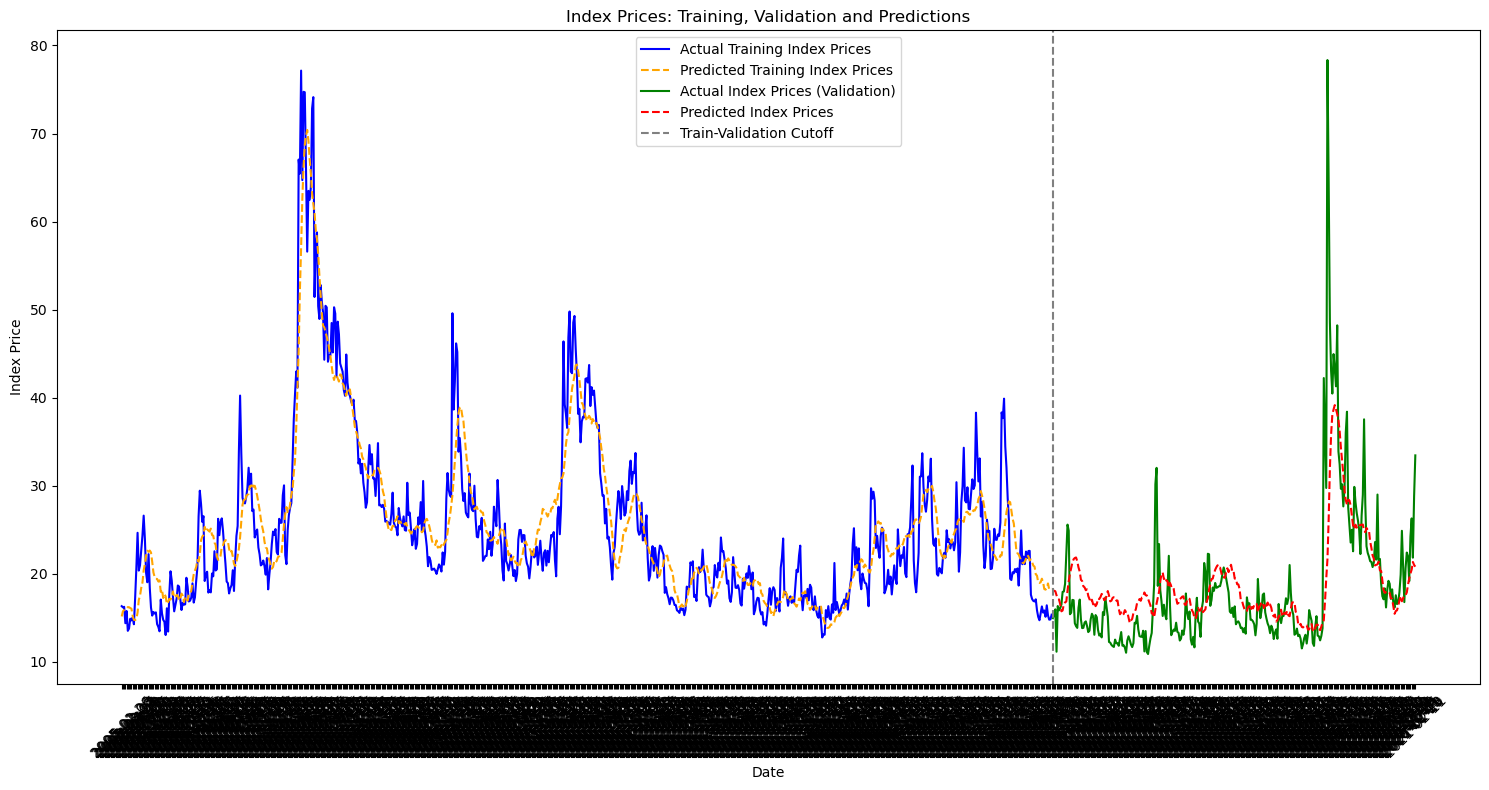

In [49]:
# Plotting the training, validation and predicted prices with cutoff

# set the figure size
plt.figure(figsize=(15, 8))

# Plotting the training data with actual_train_prices
plt.plot(dates_series[:len(actual_train_prices)], actual_train_prices, label="Actual Training Index Prices", color='blue')

# Plotting the predicted index prices for the training set
plt.plot(dates_series[:len(final_predicted_train_index_price_1_LSTM)], final_predicted_train_index_price_1_LSTM, label="Predicted Training Index Prices", color='orange', linestyle='dashed')

# Plotting the validation data (actual prices)
plt.plot(dates_series[len(actual_train_prices):len(actual_train_prices) + len(y_test_1)], actual_prices, label="Actual Index Prices (Validation)", color='green')

# Plotting the predicted prices
plt.plot(dates_series[len(y_train_2d):len(y_train_2d) + len(y_test_1)], final_predicted_index_price_1_LSTM, label="Predicted Index Prices", color='red', linestyle='dashed')

# Highlighting the training-validation cutoff
plt.axvline(x=dates_series[len(y_train_2d)], color='grey', linestyle='--', label="Train-Validation Cutoff")

plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend()
plt.title("Index Prices: Training, Validation and Predictions")
plt.xlabel("Date")
plt.ylabel("Index Price")
plt.tight_layout()
plt.show()


In [50]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping



def build_model(lstm_units=50, optimizer=None, dropout_rate=0.0, sequence_length=None, num_features=None):
    model = Sequential()
    
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(sequence_length, num_features)))
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(units=1))
    
    # Use the optimizer passed in directly
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

def clone_optimizer(optimizer):
    config = optimizer.get_config()
    return type(optimizer)(**config)


In [51]:
# Run a grid search to find the best hyperparameters

# ---------------WARNING------------------------

# The grid search takes a long time to run, you can skip this cell and use the best hyperparameters found below

# Define the hyperparameter grid
lstm_units_options = [30, 50, 70]


# set the optimizers with different learning rates
optimizers = [Adam(learning_rate=0.001), Adam(learning_rate=0.0005),
              SGD(learning_rate=0.001),SGD(learning_rate=0.0005),
              RMSprop(learning_rate=0.001), RMSprop(learning_rate=0.0005)]

# set experimental dropout rates
dropout_rates = [0.1, 0.15  ,0.2, 0.25, 0.3]

# Use grid search for hyperparameter tuning
best_val_loss = float('inf')
best_params = {}

for lstm_units in lstm_units_options:
    for optimizer in optimizers:
        for dropout_rate in dropout_rates:
            # to distinguish between the same optimizers with different learning rates
            optimizer_name = type(optimizer).__name__
            learning_rate = optimizer.get_config()['learning_rate']
            
            optimizer_id = f"{optimizer_name}_lr={learning_rate}"
            optimizer = clone_optimizer(optimizer)
            model = build_model(lstm_units=lstm_units, optimizer=optimizer, dropout_rate=dropout_rate, sequence_length=sequence_length, num_features=num_features_1)
            
            # adding early stopping and reduce learning rate on plateau
            early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5)
            
            history = model.fit(X_train_1, y_train_1, epochs=50, batch_size=100, validation_data=(X_test_1, y_test_1), callbacks=[early_stopping, reduce_lr], verbose=0)
            
            # Get the best validation loss
            val_loss = min(history.history['val_loss'])
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_params = {
                    'lstm_units': lstm_units,
                    'optimizer': optimizer,
                    'dropout_rate': dropout_rate
                }

print(f"Best validation loss: {best_val_loss}")
print("Best hyperparameters:", best_params)


Best validation loss: 0.006147157400846481
Best hyperparameters: {'lstm_units': 70, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x7f1d5b4e2be0>, 'dropout_rate': 0.1}


In [133]:
scaled2_df

,Indexvalue,10_y_bond_delta_1,weighted_prob,vstoxx_lag_1,vstoxx_ma_7,main_ref_rate,moving_avg_sentiment,euro_yield_lag_1,Close_volatility,dax_delta_1,dax_lag_1,Monday,Thursday,Tuesday,Wednesday,Date
0,0.035906,0.600374,0.881511,0.038390,0.036785,1.0,0.824089,0.640764,0.000000,0.493211,0.045468,0.0,0.0,0.0,1.0,2005-01-26
1,0.021974,0.522221,0.863662,0.020462,0.019825,1.0,0.816841,0.649444,0.000000,0.497805,0.050464,0.0,1.0,0.0,0.0,2005-02-03
2,0.029481,0.378967,0.551835,0.019944,0.028009,1.0,0.774259,0.681788,0.000000,0.512513,0.054656,1.0,0.0,0.0,0.0,2005-02-28
3,0.012090,0.330330,0.226526,0.016304,0.015911,1.0,0.687878,0.666233,0.000000,0.514934,0.060655,1.0,0.0,0.0,0.0,2005-03-07
4,0.036288,0.488350,1.000000,0.029652,0.019063,1.0,0.748571,0.669188,0.000000,0.516928,0.055605,1.0,0.0,0.0,0.0,2005-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0.197488,0.338188,0.938415,0.126571,0.153245,0.0,0.603029,0.094744,0.209706,0.236251,0.981068,0.0,0.0,0.0,0.0,2022-01-21
1087,0.228315,0.667383,0.528345,0.177660,0.225911,0.0,0.586222,0.144899,0.241233,0.271454,0.937498,0.0,0.0,0.0,0.0,2022-02-04
1088,0.162195,0.569213,0.458849,0.139695,0.186492,0.0,0.574059,0.165348,0.253277,0.518372,0.946594,0.0,1.0,0.0,0.0,2022-02-10
1089,0.265269,0.370380,0.613944,0.207401,0.222885,0.0,0.622397,0.162429,0.268154,0.396515,0.939709,0.0,1.0,0.0,0.0,2022-02-17


## Model II LSTM 

In this section we will experiment the LSTM model with market sentiment variables

In [134]:
# set the optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005, clipnorm=0.9,beta_1 = 0.9, beta_2 = 0.90, epsilon=1e-08, amsgrad=False)

# Build LSTM model
model_2_LSTM = Sequential()
model_2_LSTM.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, num_features_2))) # Use num_features instead of 4
model_2_LSTM.add(LSTM(units=50))
model_2_LSTM.add(Dense(units=1))
model_2_LSTM.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store its history
history_2_LSTM = model_2_LSTM.fit(X_train_2, y_train_2, epochs=100, batch_size=64, validation_data=(X_test_2, y_test_2))

# Access training and validation loss (can be plotted or analyzed further)
training_loss_2_LSTM = history_2_LSTM.history['loss']
validation_loss_2_LSTM = history_2_LSTM.history['val_loss']


Epoch 1/100
12/12 [==============================] - 3s 67ms/step - loss: 0.0354 - val_loss: 0.0143
Epoch 2/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0116 - val_loss: 0.0122
Epoch 3/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0082 - val_loss: 0.0109
Epoch 4/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0067 - val_loss: 0.0114
Epoch 5/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0061 - val_loss: 0.0103
Epoch 6/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0056 - val_loss: 0.0100
Epoch 7/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0052 - val_loss: 0.0096
Epoch 8/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0048 - val_loss: 0.0091
Epoch 9/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0046 - val_loss: 0.0089
Epoch 10/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0046 - val_loss: 0.0088

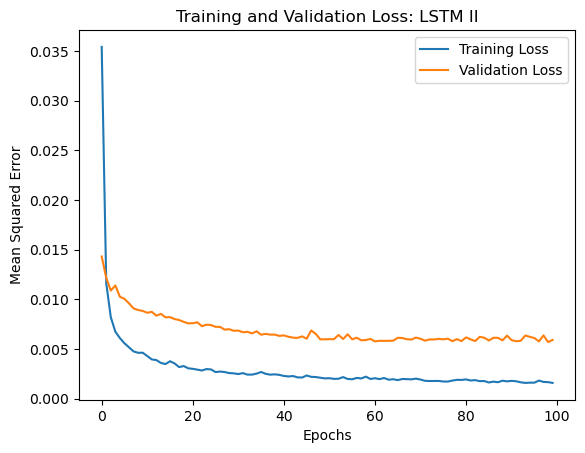

In [186]:
import matplotlib.pyplot as plt

# plot the validation and training loss

plt.plot(training_loss_2_LSTM, label='Training Loss')
plt.plot(validation_loss_2_LSTM, label='Validation Loss')
plt.title('Training and Validation Loss: LSTM II')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

#save the plot
plt.savefig("src/Output/Plots/Loss_LSTM_II.png")

plt.show()


In [55]:
# Evaluate model
predicted_index_price_2_LSTM = model_2_LSTM.predict(X_test_2)

# for the container to be compatible with the scaler, add the same number of columns as the original data
num_original_features = 15

# Create a dummy array with the same number of rows as `predicted_bond_price`
# and the same number of columns as the original data
temp_array = np.zeros((predicted_index_price_2_LSTM.shape[0], num_original_features))

# Fill the first column with `predicted_bond_price` values
temp_array[:, 0] = predicted_index_price_2_LSTM.ravel()

# Now inverse transform this array
inverse_transformed_2_LSTM = scaler.inverse_transform(temp_array)

# Extract the index price predictions from the first column
final_predicted_index_price_2_LSTM = inverse_transformed_2_LSTM[:, 0]

10/10 [==============================] - 1s 5ms/step


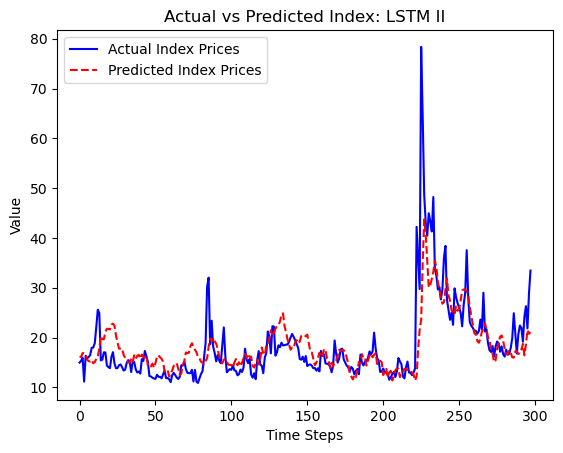

In [207]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Preparing the data for inverse transformation
# ----------------------------------------------

# Convert y_test to a 2D array for compatibility with the transformation process
y_test_2d = y_test_2.reshape(-1, 1)


# Create a placeholder array with adjusted size
placeholder_array = np.zeros((y_test_2d.shape[0], num_original_features))

# Assign the bond prices from y_test to the first column of this placeholder array.
placeholder_array[:, 0] = y_test_2d.ravel()

# Step 2: Performing the inverse transformation
# ----------------------------------------------
actual_prices = scaler.inverse_transform(placeholder_array)[:, 0]

# Step 3: Plotting the actual vs predicted values
# ----------------------------------------------------

# plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Index Prices", color='blue')
plt.plot(final_predicted_index_price_2_LSTM, label="Predicted Index Prices", color='red', linestyle='dashed')
plt.legend()
plt.title("Actual vs Predicted Index: LSTM II")
plt.xlabel("Time Steps")
plt.ylabel("Value")

#save the plot
plt.savefig("src/Output/Plots/fitted_LSTM_II.png")
plt.show()


In [57]:
test_mse_2_LSTM = model_2_LSTM.evaluate(X_test_2, y_test_2, verbose=0)
print(f"Mean Squared Error on validation set (scaled): {test_mse_2_LSTM}")


Mean Squared Error on validation set (scaled): 0.006902528926730156


In [58]:
# Calculate RMSE from the given MSE
rmse_standardized_2_LSTM = np.sqrt(test_mse_2_LSTM)

# Create a dummy array with this RMSE value in the first column and zeros elsewhere
rmse_array_standardized_2_LSTM = np.zeros((1, num_original_features))
rmse_array_standardized_2_LSTM[0, 0] = rmse_standardized_1_LSTM

# Now inverse transform this array
rmse_real_value_array = scaler.inverse_transform(rmse_array_standardized_1_LSTM)

# Extract the RMSE in real value terms
rmse_real_value_2_LSTM = rmse_real_value_array[0, 0]
print(f"Root Mean Squared Error on validation set (inverse transformed) of LSTM II: {rmse_real_value_2_LSTM}")



Root Mean Squared Error on validation set (inverse transformed) of LSTM II: 16.76382436479807


In [59]:
# create standard error and confidence margin
mse_2_LSTM = history_2_LSTM.history['val_loss'][-1]  # Taking the last value from the validation loss we will not take the lowest value, but the last one
                                                     # because the lowest value might be overfitting before the model converges
standard_error_2_LSTM = np.sqrt(mse_2_LSTM)
confidence_margin = 1.96 * standard_error_2_LSTM

# Convert y_train to a 2D array for compatibility
y_train_2d = y_train_2.reshape(-1, 1)

# Create a placeholder array for y_train with adjusted size
placeholder_array_train = np.zeros((y_train_2d.shape[0], num_original_features))

# Assign the values from y_train to the first column of this placeholder array
placeholder_array_train[:, 0] = y_train_2d.ravel()

# Perform the inverse transformation
actual_train_prices = scaler.inverse_transform(placeholder_array_train)[:, 0]

predicted_train_index_price_2_LSTM = model_2_LSTM.predict(X_train_2)

# Create a dummy array for inverse transformation
temp_array_train = np.zeros((predicted_train_index_price_2_LSTM.shape[0], num_original_features))

# Fill the first column with `predicted_train_bond_price` values
temp_array_train[:, 0] = predicted_train_index_price_2_LSTM.ravel()

# Now inverse transform this array
inverse_transformed_train_2_LSTM = scaler.inverse_transform(temp_array_train)

# Extract the bond_price predictions for the training set
final_predicted_train_index_price_2_LSTM = inverse_transformed_train_1_LSTM[:, 0]


24/24 [==============================] - 0s 6ms/step


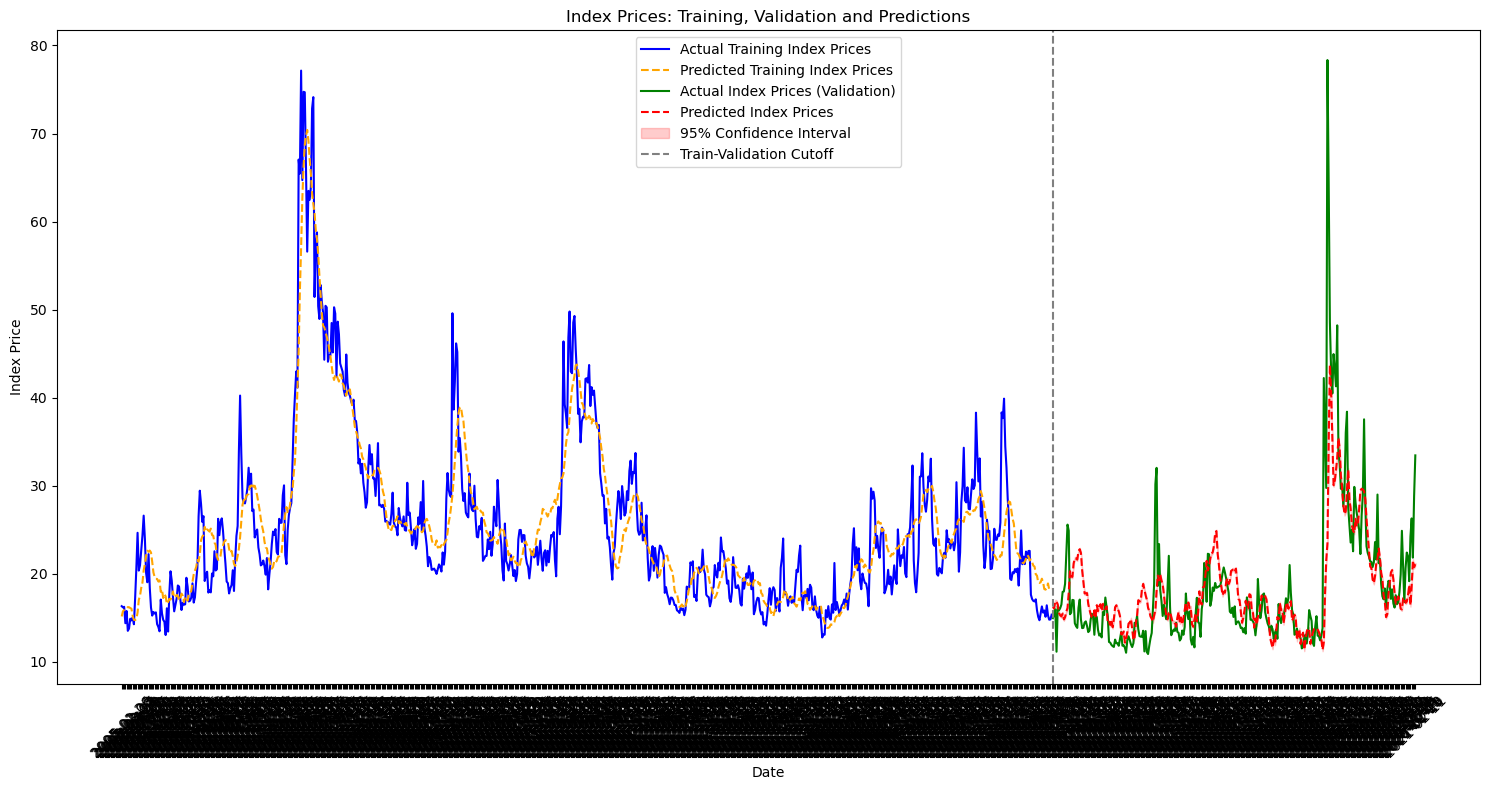

In [60]:
# Plotting the training, validation and predicted prices with cutoff

# set the figure size
plt.figure(figsize=(15, 8))

# Plotting the training data with actual_train_prices
plt.plot(dates_series[:len(actual_train_prices)], actual_train_prices, label="Actual Training Index Prices", color='blue')

# Plotting the predicted index prices for the training set
plt.plot(dates_series[:len(final_predicted_train_index_price_2_LSTM)], final_predicted_train_index_price_2_LSTM, label="Predicted Training Index Prices", color='orange', linestyle='dashed')

# Plotting the validation data (actual prices)
plt.plot(dates_series[len(actual_train_prices):len(actual_train_prices) + len(y_test_2)], actual_prices, label="Actual Index Prices (Validation)", color='green')

# Plotting the predicted prices
plt.plot(dates_series[len(y_train_2d):len(y_train_2d) + len(y_test_2)], final_predicted_index_price_2_LSTM, label="Predicted Index Prices", color='red', linestyle='dashed')

# Shading the 95% confidence interval
plt.fill_between(dates_series[len(y_train_2d):len(y_train_2d) + len(y_test_2)], 
                 (final_predicted_index_price_2_LSTM - confidence_margin), 
                 (final_predicted_index_price_2_LSTM + confidence_margin), 
                 color='red', 
                 alpha=0.2,
                 label='95% Confidence Interval')

# Highlighting the training-validation cutoff
plt.axvline(x=dates_series[len(y_train_2d)], color='grey', linestyle='--', label="Train-Validation Cutoff")

plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend()
plt.title("Index Prices: Training, Validation and Predictions")
plt.xlabel("Date")
plt.ylabel("Index Price")
plt.tight_layout()
plt.show()


In [61]:
# Run a grid search to find the best hyperparameters

# ---------------WARNING------------------------

# The grid search takes a long time to run, you can skip this cell and use the best hyperparameters found below

# Define the hyperparameter grid
lstm_units_options = [30, 50, 70]

# set the optimizers with different learning rates
optimizers = [Adam(learning_rate=0.001), Adam(learning_rate=0.0005),
              SGD(learning_rate=0.001),SGD(learning_rate=0.0005),
              RMSprop(learning_rate=0.001), RMSprop(learning_rate=0.0005)]

# set experimental dropout rates
dropout_rates = [0.1, 0.15  ,0.2, 0.25, 0.3]

# Use grid search for hyperparameter tuning
best_val_loss = float('inf')
best_params = {}

for lstm_units in lstm_units_options:
    for optimizer in optimizers:
        for dropout_rate in dropout_rates:
            # to distinguish between the same optimizers with different learning rates
            optimizer_name = type(optimizer).__name__
            learning_rate = optimizer.get_config()['learning_rate']
            
            optimizer_id = f"{optimizer_name}_lr={learning_rate}"
            optimizer = clone_optimizer(optimizer)
            model_grid_2_LSTM = build_model(lstm_units=lstm_units, optimizer=optimizer, dropout_rate=dropout_rate, sequence_length=sequence_length, num_features=num_features_2)
            
            # adding early stopping and reduce learning rate on plateau
            early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5)
            
            history = model_grid_2_LSTM.fit(X_train_2, y_train_2, epochs=50, batch_size=100, validation_data=(X_test_2, y_test_2), callbacks=[early_stopping, reduce_lr], verbose=0)
            
            # Get the best validation loss
            val_loss = min(history.history['val_loss'])
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_params = {
                    'lstm_units': lstm_units,
                    'optimizer': optimizer,
                    'dropout_rate': dropout_rate
                }

print(f"Best validation loss: {best_val_loss}")
print("Best hyperparameters:", best_params)


Best validation loss: 0.0060940030962228775
Best hyperparameters: {'lstm_units': 50, 'optimizer': <keras.src.optimizers.rmsprop.RMSprop object at 0x7f1d40c17be0>, 'dropout_rate': 0.1}


# Transformers time series without sentiments

In [62]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, MultiHeadAttention, LayerNormalization, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [63]:
# prepare the data for the transformer model

# set the sequence length
sequence_length = 30 # this is the number of days we will use to predict the next day

# set the number of features
num_features = 15

# the transformer model requires numeric values only, therefore we drop the date column
scaled1_t = scaled1_df.drop(columns=['Date']).values

# Prepare the data for the transformer model
def create_sequences(data, sequence_length):
    """
    Generates input-output sequence pairs from the provided data for time series forecasting.

    Parameters:
    - data (np.array or list): Time series data.
    - sequence_length (int): Length of the input sequences.

    Returns:
    - tuple: A tuple containing:
        - X (np.array): Input sequences of shape (number of samples, sequence_length, number of features).
        - y (np.array): Corresponding output sequences (next time step) of shape (number of samples, number of features).

    Notes:
    The function slides a window of size `sequence_length` over the provided data. For each window position, 
    it appends the window's content to `X` and the next data point in the series to `y`.
    """
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)


X_1_sequential, y_1_sequential = create_sequences(scaled1_t, sequence_length)

# Split the data into training and testing sets
train_size = int(0.7 * len(dates_series)) # making sure the split does not shuffle the dates

# take the first 70% of the dates for training and the rest for testing
X_1_train_seq, X_1_test_seq = X_1_sequential[:train_size], X_1_sequential[train_size:] 
y_1_train_seq, y_1_test_seq = y_1_sequential[:train_size], y_1_sequential[train_size:]

In [64]:
# the transformation should create 3D arrays for transformer model, make sure the shapes are correct
X_1_train_seq.shape, X_1_test_seq.shape, y_1_train_seq.shape, y_1_test_seq.shape

((763, 30, 13), (298, 30, 13), (763, 13), (298, 13))

In [65]:
# Transformer block
def transformer_block(inputs, num_heads, key_dim, dropout_rate=0.1):
    """
    Defines a transformer block with multi-head attention and feed-forward neural network layers.

    Parameters:
    - inputs (tf.Tensor): Input tensor for the transformer block.
    - num_heads (int): Number of attention heads for the multi-head attention layer.
    - key_dim (int): Dimensionality of the key vectors for the multi-head attention.
    - dropout_rate (float, optional): Dropout rate for the dropout layers. Default is 0.1.

    Returns:
    - tf.Tensor: Output tensor after passing through the transformer block.

    Notes:
    The function constructs a transformer block consisting of:
    1. Multi-head attention layer with residual connection and layer normalization.
    2. Feed-forward neural network with two dense layers, followed by a residual connection and layer normalization.
    """
    # Multi-head attention layer
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attention_output)
    
    # Feed-forward neural network
    ffnn = Dense(units=128, activation='relu')(out1)  # Increase the units to 128
    ffnn = Dense(units=num_features, activation='relu')(ffnn)  # Match the output dimensions with `num_features`
    ffnn = Dropout(dropout_rate)(ffnn)
    out2 = LayerNormalization(epsilon=1e-6)(out1 + ffnn)
    
    return out2

In [66]:
# Transformer model for multivariate time series forecasting
def transformer_model(sequence_length, num_features):
    """
    Constructs a Transformer-based model for multivariate time series forecasting.

    Parameters:
    - sequence_length (int): Length of the input time series sequence.
    - num_features (int): Number of features in the input data.

    Returns:
    - tf.keras.Model: Compiled Transformer-based forecasting model.

    Notes:
    The function constructs a model with the following architecture:
    1. Input layer that accepts sequences of shape (sequence_length, num_features).
    2. Transformer block that processes the input sequences.
    3. Flatten layer to produce a single time step from the transformer output.
    4. Dense output layer that predicts the next time step for all features.
    The model is compiled with the Adam optimizer and mean squared error loss.
    """
    # Input layer
    inputs = Input(shape=(sequence_length, num_features))
    
    # Transformer block
    transformer = transformer_block(inputs, num_heads=4, key_dim=sequence_length)
    
    # Flatten the transformer output to produce a single time step
    flattened = tf.keras.layers.Flatten()(transformer)
    
    # Output layer
    outputs = Dense(units=num_features)(flattened)
    
    # Compile the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

In [67]:
# Instantiate the model
num_features = 13
model_1_transformers = transformer_model(sequence_length, num_features=13)

# Train the model
history_1_transformers = model_1_transformers.fit(X_1_train_seq, y_1_train_seq, epochs=100, 
                                                  batch_size=64, validation_data=(X_1_test_seq, y_1_test_seq))

# Predictions
predicted_1_values_transformers = model_1_transformers.predict(X_1_test_seq)

# Create a placeholder array for predictions
placeholder_array = np.zeros((predicted_1_values_transformers.shape[0], 15))
placeholder_array[:, :13] = predicted_1_values_transformers


# inverse transform the predicted values
# inv_1_T = scaler.inverse_transform(predicted_1_values_transformers)

inv_1_T = scaler.inverse_transform(placeholder_array)

# Extract the desired predictions (e.g., bond price) from the transformed data
final_predictions_transformers_1 = inv_1_T[:, 0]

Epoch 1/100
12/12 [==============================] - 2s 29ms/step - loss: 1.2715 - val_loss: 0.5948
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 0.4453 - val_loss: 0.2474
Epoch 3/100
12/12 [==============================] - 0s 15ms/step - loss: 0.2612 - val_loss: 0.1522
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 0.2152 - val_loss: 0.1234
Epoch 5/100
12/12 [==============================] - 0s 13ms/step - loss: 0.1898 - val_loss: 0.1020
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.1704 - val_loss: 0.0907
Epoch 7/100
12/12 [==============================] - 0s 13ms/step - loss: 0.1553 - val_loss: 0.0883
Epoch 8/100
12/12 [==============================] - 0s 14ms/step - loss: 0.1463 - val_loss: 0.0843
Epoch 9/100
12/12 [==============================] - 0s 14ms/step - loss: 0.1355 - val_loss: 0.0809
Epoch 10/100
12/12 [==============================] - 0s 14ms/step - loss: 0.1305 - val_loss: 0.0772

In [68]:
model_1_transformers.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30, 13)]             0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 30, 13)               6613      ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout_360 (Dropout)       (None, 30, 13)               0         ['multi_head_attention[0][0]']
                                                                                                  
 tf.__operators__.add (TFOp  (None, 30, 13)               0         ['input_1[0][0]',         

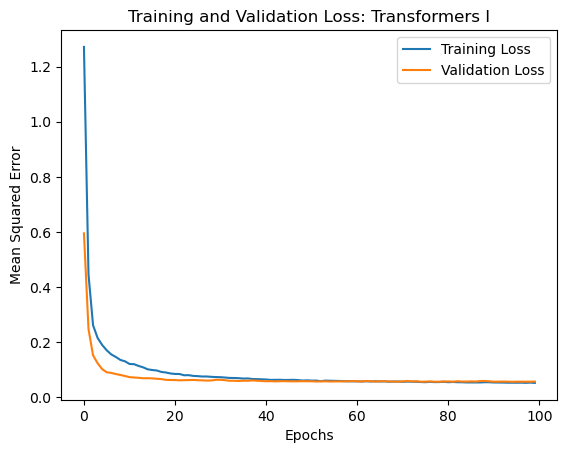

In [197]:
import matplotlib.pyplot as plt

# Extract loss and validation loss values from the history object
train_loss = history_1_transformers.history['loss']
val_loss = history_1_transformers.history['val_loss']

# Plotting
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss: Transformers I')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
# save the plot
plt.savefig("src/Output/Plots/Loss_Transformers_I.png")
plt.show()


In [157]:
min(val_loss)

0.05419281870126724

In [70]:
y_1_test_seq.shape

(298, 13)

In [71]:
from sklearn.metrics import mean_squared_error

# Create a placeholder array for the actual values with the correct shape
placeholder_actual = np.zeros((y_1_test_seq.shape[0], 15))
placeholder_actual[:, :13] = y_1_test_seq
inv_actual_1_T = scaler.inverse_transform(placeholder_actual)[:, 0]

# Create a placeholder array for the predicted values with the correct shape
placeholder_predicted = np.zeros((predicted_1_values_transformers.shape[0], 15))
placeholder_predicted[:, :13] = predicted_1_values_transformers

# Compute MSE and RMSE using scaled values
mse_scaled_transformers_1 = mean_squared_error(y_1_test_seq[:, 0], scaler.transform(placeholder_predicted)[:, 0])
rmse_scaled_transformers_1 = np.sqrt(mse_scaled_transformers_1)

# Print the results
print(f"Mean Squared Error (MSE): {mse_scaled_transformers_1}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled_transformers_1}")


Mean Squared Error (MSE): 0.08696717186661726
Root Mean Squared Error (RMSE): 0.2949019699266474


/home/ozodbek/anaconda3/envs/master_thesis_env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


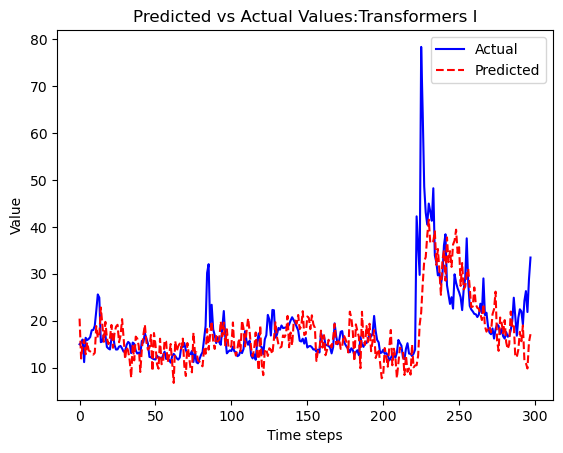

In [188]:
# Plotting Predicted vs Actual values using scaled values
# plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual', color='blue')
plt.plot(final_predictions_transformers_1, label='Predicted', color='red', linestyle='dashed')
plt.title('Predicted vs Actual Values:Transformers I')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.legend()
#save the plot
plt.savefig("src/Output/Plots/fitted_transformers_I.png")

plt.show()

# Transformers time series with sentiments

In [73]:
# set the same sequence length and new number of features with two more features
sequence_length = 30
num_features = 15

# create the sequential data
X_2_sequential, y_2_sequential = create_sequences(scaled_data_2, sequence_length)

# Split the data into training and testing sets
train_size = int(0.7 * len(dates_series))

# take the first 70% of the dates for training and the rest for testing
X_2_train_seq, X_2_test_seq = X_2_sequential[:train_size], X_2_sequential[train_size:]
y_2_train_seq, y_2_test_seq = y_2_sequential[:train_size], y_2_sequential[train_size:]

In [74]:
# the transformation should create 3D arrays for transformer model, make sure the shapes are correct
X_2_train_seq.shape, X_2_test_seq.shape, y_2_train_seq.shape, y_2_test_seq.shape

((763, 30, 15), (298, 30, 15), (763, 15), (298, 15))

In [75]:
# Instantiate the model
num_features = 15
model_2_transformers = transformer_model(sequence_length, num_features=15)

# Train the model
history_2_transformers = model_2_transformers.fit(X_2_train_seq, y_2_train_seq, epochs=100, batch_size=64,
                                                   validation_data=(X_2_test_seq, y_2_test_seq))

# Predictions
predicted_2_values_transformers = model_2_transformers.predict(X_2_test_seq)

# Create a placeholder array for predictions
placeholder_array = np.zeros((predicted_2_values_transformers.shape[0], 15))
placeholder_array[:, :15] = predicted_2_values_transformers


# inverse transform the predicted values
# inv_1_T = scaler.inverse_transform(predicted_1_values_transformers)

inv_2_T = scaler.inverse_transform(placeholder_array)

# Extract the desired predictions from the transformed data
final_predictions_transformers_2 = inv_2_T[:, 0]

Epoch 1/100
12/12 [==============================] - 2s 40ms/step - loss: 0.9928 - val_loss: 0.4977
Epoch 2/100
12/12 [==============================] - 0s 15ms/step - loss: 0.3470 - val_loss: 0.1887
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 0.2156 - val_loss: 0.1219
Epoch 4/100
12/12 [==============================] - 0s 15ms/step - loss: 0.1815 - val_loss: 0.1047
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 0.1738 - val_loss: 0.0937
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 0.1592 - val_loss: 0.0903
Epoch 7/100
12/12 [==============================] - 0s 15ms/step - loss: 0.1524 - val_loss: 0.0862
Epoch 8/100
12/12 [==============================] - 0s 16ms/step - loss: 0.1440 - val_loss: 0.0815
Epoch 9/100
12/12 [==============================] - 0s 20ms/step - loss: 0.1324 - val_loss: 0.0775
Epoch 10/100
12/12 [==============================] - 0s 20ms/step - loss: 0.1287 - val_loss: 0.0758

array([[0.06038666, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06585789, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07519309, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16219454, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26526866, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33442412, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [76]:
# display the summary of the model
model_2_transformers.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 30, 15)]             0         []                            
                                                                                                  
 multi_head_attention_1 (Mu  (None, 30, 15)               7575      ['input_2[0][0]',             
 ltiHeadAttention)                                                   'input_2[0][0]']             
                                                                                                  
 dropout_362 (Dropout)       (None, 30, 15)               0         ['multi_head_attention_1[0][0]
                                                                    ']                            
                                                                                            

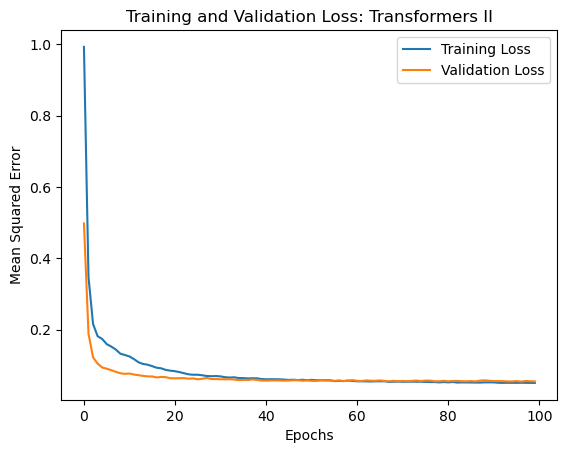

In [198]:
import matplotlib.pyplot as plt

# Extract loss and validation loss values from the history object
train_loss = history_2_transformers.history['loss']
val_loss = history_2_transformers.history['val_loss']

# Plotting
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss: Transformers II')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
#save the plot
plt.savefig("src/Output/Plots/Loss_transformers_II.png")
plt.show()

0.0546298585832119

In [78]:
from sklearn.metrics import mean_squared_error

# Create a placeholder array for the actual values with the correct shape
placeholder_actual = np.zeros((y_2_test_seq.shape[0], 15))
placeholder_actual[:, :15] = y_2_test_seq
inv_actual_2_T = scaler.inverse_transform(placeholder_actual)[:, 0]

# Create a placeholder array for the predicted values with the correct shape
placeholder_predicted = np.zeros((predicted_2_values_transformers.shape[0], 15))
placeholder_predicted[:, :15] = predicted_2_values_transformers

# Compute MSE and RMSE using scaled values
mse_scaled_transformers_2 = mean_squared_error(y_2_test_seq[:, 0], scaler.transform(placeholder_predicted)[:, 0])
rmse_scaled_transformers_2 = np.sqrt(mse_scaled_transformers_2)

# Print the results
print(f"Mean Squared Error (MSE): {mse_scaled_transformers_2}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled_transformers_2}")

Mean Squared Error (MSE): 0.08652096595168964
Root Mean Squared Error (RMSE): 0.2941444644246933


/home/ozodbek/anaconda3/envs/master_thesis_env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# standardize predicted_2_values_transformers 


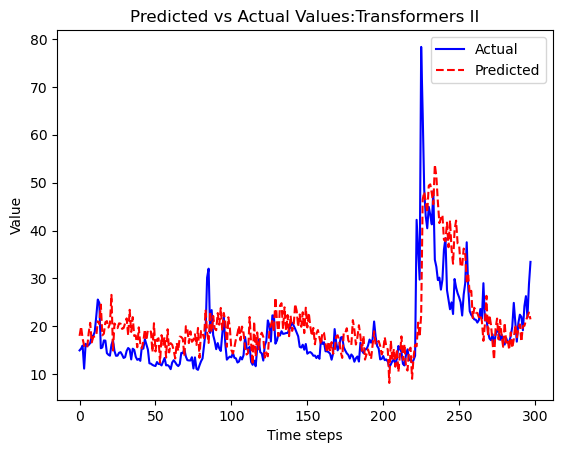

In [205]:
# Plotting Predicted vs Actual values using scaled values
#plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual', color='blue')
plt.plot(final_predictions_transformers_2, label='Predicted', color='red', linestyle='dashed')
plt.title('Predicted vs Actual Values:Transformers II')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.legend()
#save the plot
plt.savefig("src/Output/Plots/fitted_transformers_II.png")
plt.show()

# Model comparison tables and visualizations

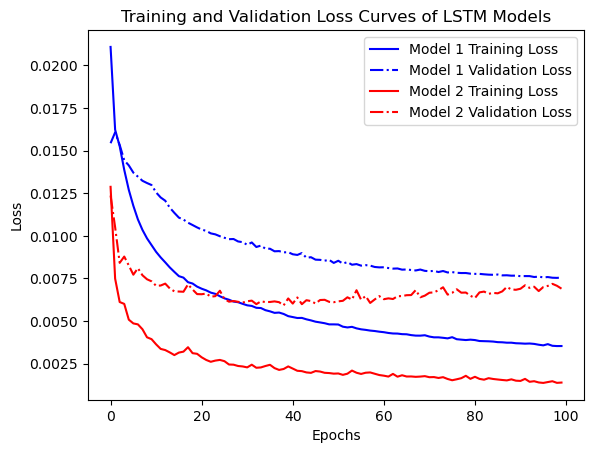

In [80]:
import matplotlib.pyplot as plt


plt.plot(training_loss_1_LSTM, label='Model 1 Training Loss', color='blue')
plt.plot(validation_loss_1_LSTM, label='Model 1 Validation Loss', color='blue', linestyle='dashdot')
plt.plot(training_loss_2_LSTM, label='Model 2 Training Loss', color='red')
plt.plot(validation_loss_2_LSTM, label='Model 2 Validation Loss', color='red', linestyle='dashdot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves of LSTM Models')
plt.show()

In [81]:
from sklearn.metrics import mean_absolute_error

mae_1 = mean_absolute_error(y_test_1, model_1_LSTM.predict(X_test_1))
mae_2 = mean_absolute_error(y_test_2, model_2_LSTM.predict(X_test_2))

# Print the results
print(f"Mean Absolute Error (MAE) of LSTM I: {mae_1}")
print(f"Mean Absolute Error (MAE) of LSTM II: {mae_2}")


 1/10 [==>...........................] - ETA: 0s

10/10 [==============================] - 0s 5ms/step
Mean Absolute Error (MAE) of LSTM I: 0.051139339034665096
Mean Absolute Error (MAE) of LSTM II: 0.046485183643344426


In [82]:
residuals_1 = y_test_1 - model_1_LSTM.predict(X_test_1).ravel()
residuals_2 = y_test_2 - model_2_LSTM.predict(X_test_2).ravel()

 1/10 [==>...........................] - ETA: 0s

10/10 [==============================] - 0s 5ms/step


In [83]:
residuals_1.shape, residuals_2.shape

((298,), (298,))

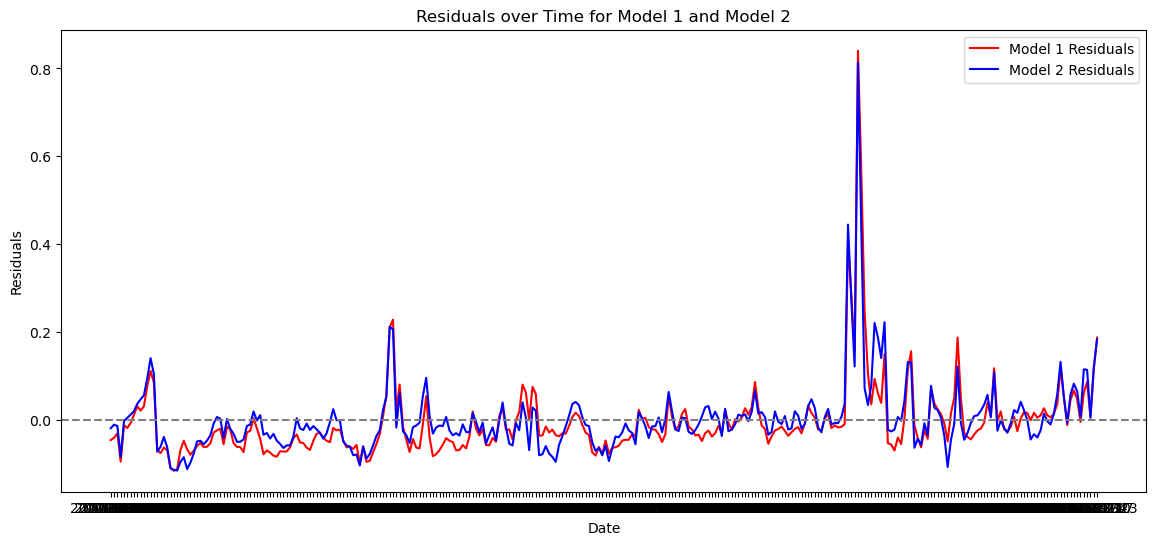

In [84]:
dates_test = dates_test[-298:]  # take the last 298 dates
plt.figure(figsize=(14, 6))

# Plot residuals for Model 1
plt.plot(dates_test, residuals_1, label='Model 1 Residuals', color='red')

# Plot residuals for Model 2
plt.plot(dates_test, residuals_2, label='Model 2 Residuals', color='blue')

# Add a horizontal line at y=0
plt.axhline(y=0, color='grey', linestyle='--')

# Labeling and titles
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals over Time for Model 1 and Model 2')

plt.show()


In [85]:
params_1 = model_1_LSTM.count_params()
params_2 = model_2_LSTM.count_params()
params_1 , params_2

(32851, 33251)

In [86]:
import pandas as pd

# Quantitative Metrics
data = {
    'Metric/Aspect': [
        'MSE', 
        'RMSE',
        'Best Validation Loss', 
        'Number of LSTM Units', 
        'Dropout Rate', 
        'Optimizer Type', 
        'Number of Training Epochs',
        'Number of Parameters'
    ],
    'Model 1': [
        mse_1_LSTM,
        rmse_real_value_1_LSTM,  
        min(history_1_LSTM.history['val_loss']), 
        model_1_LSTM.layers[0].units,  
        "0.1",
        model_1_LSTM.optimizer.get_config()['name'],
        len(history_1_LSTM.history['loss']),
        params_1
    ],
    'Model 2': [
        mse_2_LSTM, 
        rmse_real_value_2_LSTM,
        min(history_2_LSTM.history['val_loss']), 
        model_2_LSTM.layers[0].units, 
        "0.3",
        model_2_LSTM.optimizer.get_config()['name'],
        len(history_2_LSTM.history['loss']),
        params_2
    ]
}

# Create DataFrame
model_comparison = pd.DataFrame(data)

print(model_comparison)



               Metric/Aspect    Model 1    Model 2
0                        MSE   0.007553   0.006903
1                       RMSE  16.763824  16.763824
2       Best Validation Loss   0.007535   0.005923
3       Number of LSTM Units         50         50
4               Dropout Rate        0.1        0.3
5             Optimizer Type       Adam       Adam
6  Number of Training Epochs        100        100
7       Number of Parameters      32851      33251


In [87]:
latex_code = model_comparison.to_latex(index=False)
latex_code

'\\begin{tabular}{lll}\n\\toprule\nMetric/Aspect & Model 1 & Model 2 \\\\\n\\midrule\nMSE & 0.007553 & 0.006903 \\\\\nRMSE & 16.763824 & 16.763824 \\\\\nBest Validation Loss & 0.007535 & 0.005923 \\\\\nNumber of LSTM Units & 50 & 50 \\\\\nDropout Rate & 0.1 & 0.3 \\\\\nOptimizer Type & Adam & Adam \\\\\nNumber of Training Epochs & 100 & 100 \\\\\nNumber of Parameters & 32851 & 33251 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Variable importance and feature selection with Random forest and XGBoost
# Random forest I

In [88]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Sort the DataFrame by Date
scaled1_df = scaled1_df.sort_values(by='Date')

# Save the variable names for later use (excluding 'Date' and 'Indexvalue')
feature_names_1_rf = scaled1_df.columns[scaled1_df.columns != 'Date']
feature_names_1_rf = feature_names_1_rf[feature_names_1_rf != 'Indexvalue'].tolist()

# Drop the 'Date' column
scaled_data_1_rf = scaled1_df.drop(columns=['Date']).values

# Define the split point
split_point_rf = int(0.8 * len(scaled_data_1_rf))

# Split the data into training and test sets
train_data_1_rf = scaled_data_1_rf[:split_point_rf]
test_data_1_rf = scaled_data_1_rf[split_point_rf:]

# Separate Features and Target
X_train_1_rf = train_data_1_rf[:, 1:]
y_train_1_rf = train_data_1_rf[:, 0]

X_test_1_rf = test_data_1_rf[:, 1:]
y_test_1_rf = test_data_1_rf[:, 0]

In [89]:
feature_names_1_rf

['10_y_bond_delta_1',
 'vstoxx_lag_1',
 'vstoxx_ma_7',
 'main_ref_rate',
 'euro_yield_lag_1',
 'Close_volatility',
 'dax_delta_1',
 'dax_lag_1',
 'Monday',
 'Thursday',
 'Tuesday',
 'Wednesday']

In [90]:
# Initialize the Random Forest Regressor for the first dataset
rf_model_1_rf = RandomForestRegressor(n_estimators=200,  # Number of trees in the forest
                                      max_depth=None,     # Maximum depth of the tree
                                      min_samples_split=2,  # Minimum number of samples required to split an internal node
                                      min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
                                      random_state=42,
                                      oob_score = True)      # Seed for reproducibility

# Train the Random Forest model on the first dataset
rf_model_1_rf.fit(X_train_1_rf, y_train_1_rf)

# Predict on the test set for the first dataset
y_pred_1_rf = rf_model_1_rf.predict(X_test_1_rf)

# Extract feature importance from the trained model
feature_importance_1_rf = rf_model_1_rf.feature_importances_

In [91]:
y_pred_1_rf.shape, y_test_1_rf.shape

((219,), (219,))

In [92]:
# Extract feature importance from the trained model
feature_importance_1_rf = rf_model_1_rf.feature_importances_
feature_importance_1_rf



array([2.17718706e-03, 8.98292300e-01, 7.98602220e-02, 4.96202063e-04,
       1.27238056e-03, 3.17446553e-03, 1.15462128e-02, 2.42343719e-03,
       3.43848451e-04, 1.86398833e-04, 1.43895871e-04, 8.34493236e-05])

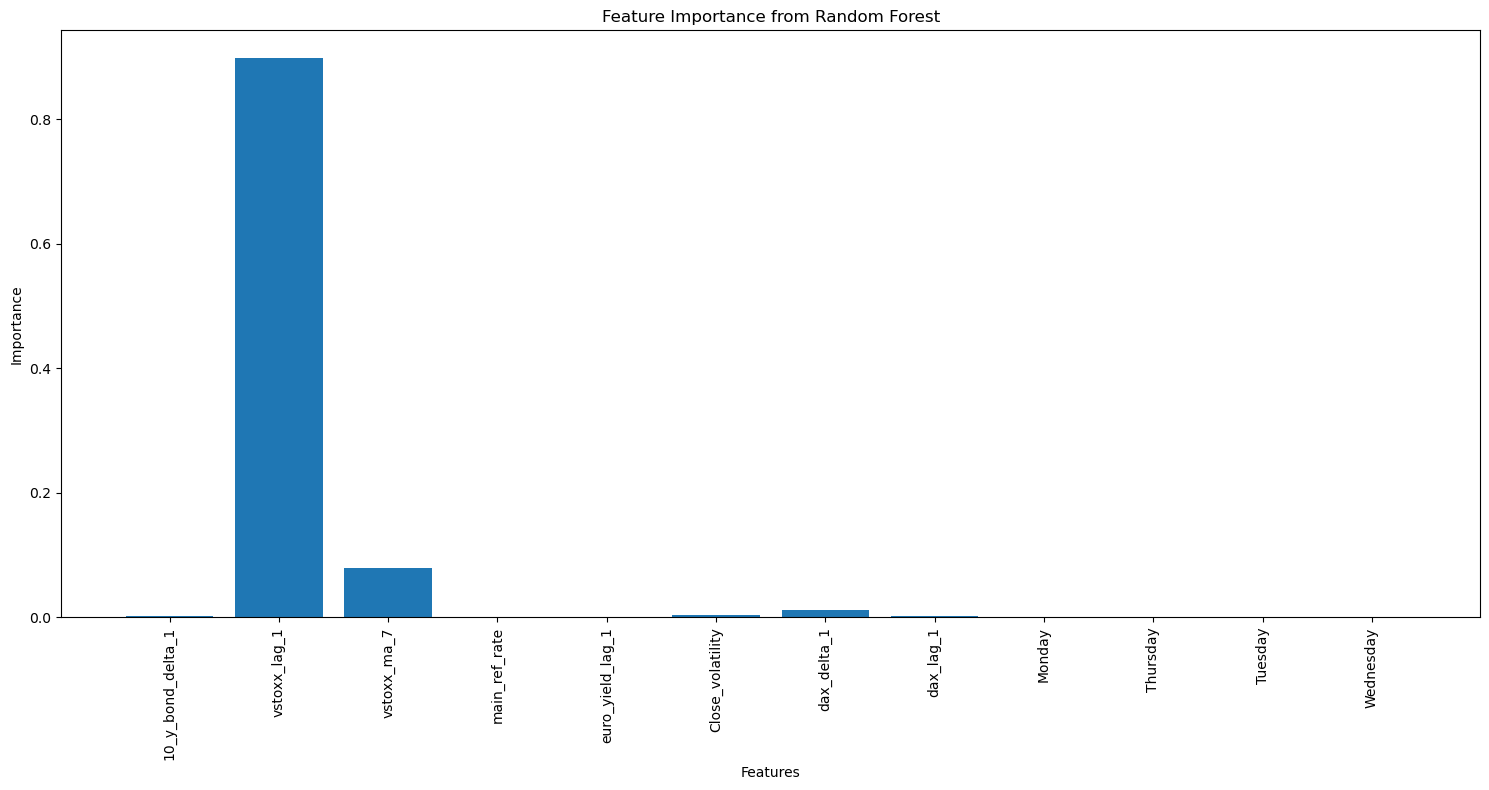

In [93]:
# Plot the feature importance
plt.figure(figsize=(15, 8))
plt.bar(feature_names_1_rf, feature_importance_1_rf)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

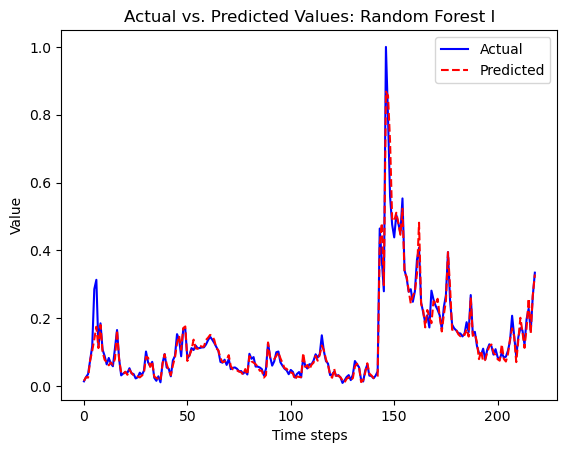

In [190]:
# Plot Actual vs Predicted values 
#plt.figure(figsize=(12, 6))
plt.plot(y_test_1_rf, label='Actual', color='blue')
plt.plot(y_pred_1_rf, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values: Random Forest I')
plt.legend()
#save the plot
plt.savefig("src/Output/Plots/fitted_RF_I.png")
plt.show()


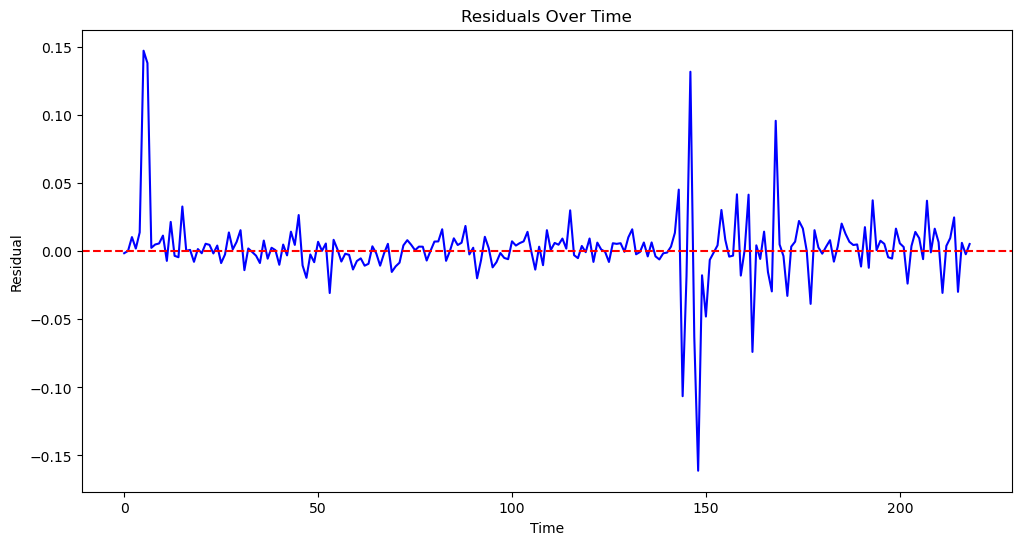

In [95]:
residuals = y_test_1_rf - y_pred_1_rf

plt.figure(figsize=(12, 6))
plt.plot(residuals, color='blue')
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.title('Residuals Over Time')
plt.show()


In [96]:
oob_error = 1 - rf_model_1_rf.oob_score_
oob_error

0.01877621799191087

In [97]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred_1_rf_rf = rf_model_1_rf.predict(X_test_1_rf)

# Calculate MSE
mse = mean_squared_error(y_test_1_rf, y_pred_1_rf_rf)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MSE: 0.0006834524149876213
RMSE: 0.026142922847065538


# Random Forest II

In [98]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Sort the DataFrame by Date
scaled2_df = scaled2_df.sort_values(by='Date')

# Save the variable names for later use (excluding 'Date' and 'Indexvalue')
feature_names_2_rf = scaled2_df.columns[scaled2_df.columns != 'Date']
feature_names_2_rf = feature_names_2_rf[feature_names_2_rf != 'Indexvalue'].tolist()

# Drop the 'Date' column
scaled_data_2_rf = scaled2_df.drop(columns=['Date']).values

# Define the split point
split_point_rf = int(0.8 * len(scaled_data_1_rf))

# Split the data into training and test sets
train_data_2_rf = scaled_data_2_rf[:split_point_rf]
test_data_2_rf = scaled_data_2_rf[split_point_rf:]

# Separate Features and Target
X_train_2_rf = train_data_2_rf[:, 1:]
y_train_2_rf = train_data_2_rf[:, 0]

X_test_2_rf = test_data_2_rf[:, 1:]
y_test_2_rf = test_data_2_rf[:, 0]

In [99]:
# Initialize the Random Forest Regressor for the first dataset
rf_model_2 = RandomForestRegressor(n_estimators=200,  # Number of trees in the forest
                                      max_depth=None,     # Maximum depth of the tree
                                      min_samples_split=2,  # Minimum number of samples required to split an internal node
                                      min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
                                      random_state=42,
                                      oob_score = True)      # Seed for reproducibility

# Train the Random Forest model on the first dataset
rf_model_2.fit(X_train_2_rf, y_train_2_rf)

# Predict on the test set for the first dataset
y_pred_2_rf = rf_model_2.predict(X_test_2_rf)

# Extract feature importance from the trained model
feature_importance_2_rf = rf_model_2.feature_importances_

In [153]:
y_pred_2_rf.shape, y_test_2_rf.shape

((219,), (219,))

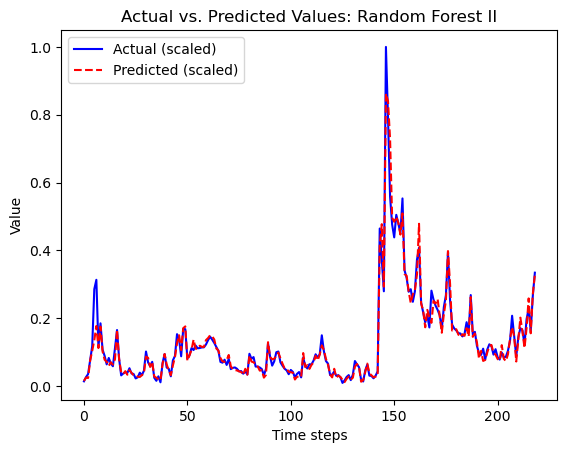

In [191]:
# Plot Actual vs Predicted values 
#plt.figure(figsize=(12, 6))
plt.plot(y_test_2_rf, label='Actual (scaled)', color='blue')
plt.plot(y_pred_2_rf, label='Predicted (scaled)', color='red', linestyle='dashed')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values: Random Forest II')
plt.legend()
#save the plot
plt.savefig("src/Output/Plots/fitted_RF_II.png")
plt.show()


In [154]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse_2_rf = mean_squared_error(y_test_2_rf, y_pred_2_rf)

# Calculate RMSE
rmse_2_rf = np.sqrt(mse_2_rf)

print(f"MSE: {mse_2_rf}")
print(f"RMSE: {rmse_2_rf}")


MSE: 0.0007007801545820578
RMSE: 0.026472252540765354


In [156]:
oob_error_2 = 1 - rf_model_2.oob_score_
oob_error_2

0.01917977241920521

In [101]:
# Extract feature importance from the trained model
feature_importance_2_rf = rf_model_2.feature_importances_
feature_importance_2_rf

array([1.93020851e-03, 1.11239971e-03, 8.97414436e-01, 7.95036808e-02,
       4.05273026e-04, 1.59282558e-03, 9.72779777e-04, 2.97439027e-03,
       1.11160749e-02, 2.35598103e-03, 2.86235843e-04, 1.66279767e-04,
       1.07076595e-04, 6.23578650e-05])

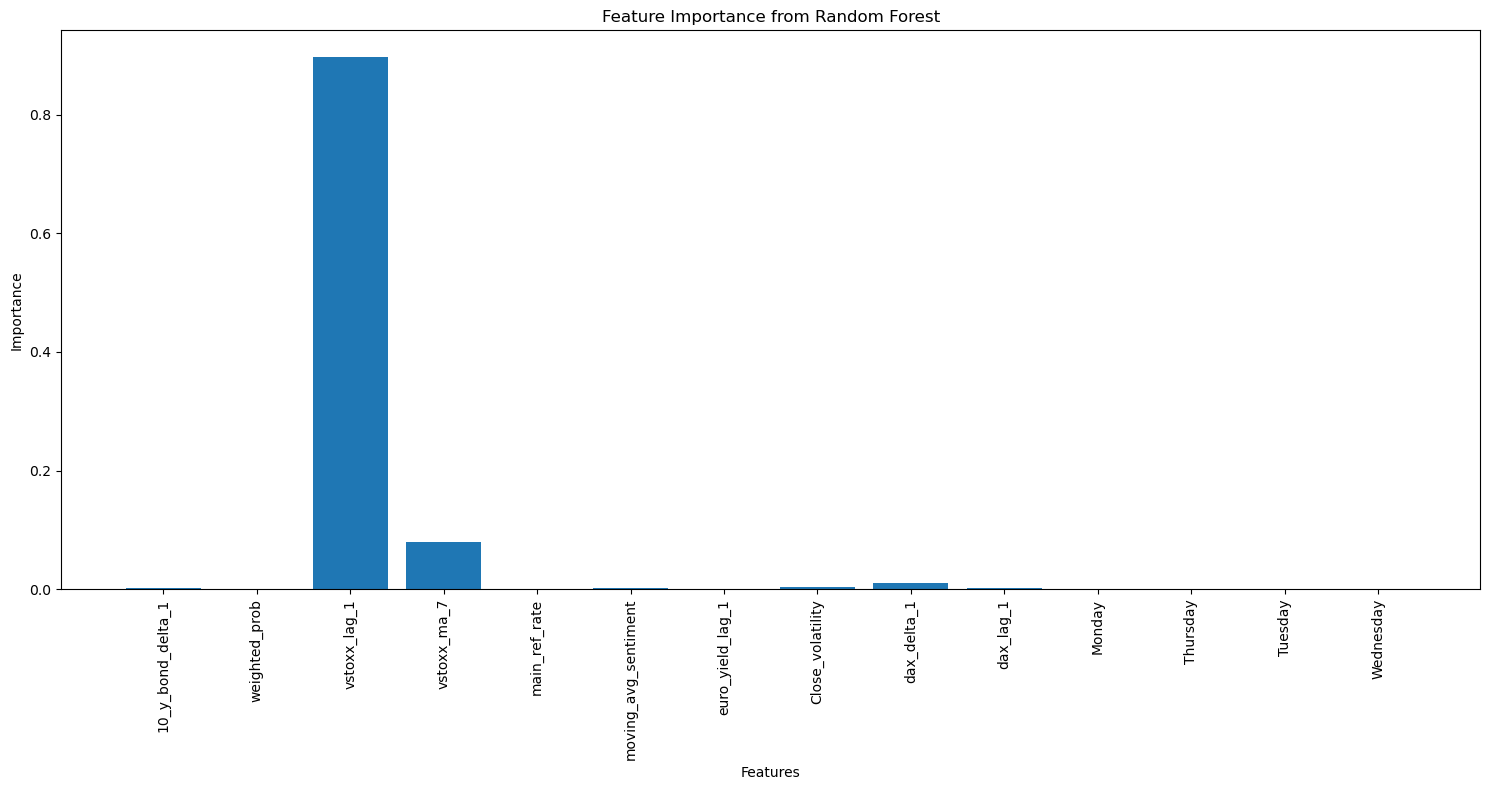

In [102]:
"""
# for better visualization remove the autocorrelated features 'vstoxx_lag_1' and 'vstoxx_ma_7'
feature_names_2_rf = feature_names_2_rf[feature_names_2_rf != 'vstoxx_lag_1']
feature_names_2_rf = feature_names_2_rf[feature_names_2_rf != 'vstoxx_ma_7']

# also from feature importance remove the autocorrelated features 'vstoxx_lag_1' and 'vstoxx_ma_7'
feature_importance_2_rf = feature_importance_2_rf[feature_importance_2_rf != 'vstoxx_lag_1']
feature_importance_2_rf = feature_importance_2_rf[feature_importance_2_rf != 'vstoxx_ma_7']
"""

# Plot the feature importance
plt.figure(figsize=(15, 8))
plt.bar(feature_names_2_rf, feature_importance_2_rf)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

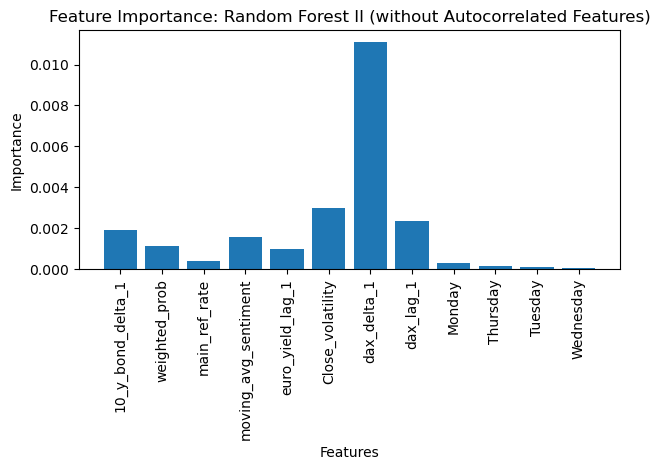

In [184]:
import pandas as pd

# Create a DataFrame with feature names and their importance values
df_importance = pd.DataFrame({
    'Feature': feature_names_2_rf,
    'Importance': feature_importance_2_rf
})

# Remove the specified features
df_importance = df_importance[~df_importance['Feature'].isin(['vstoxx_lag_1', 'vstoxx_ma_7'])]

# Plot the updated feature importance
plt.bar(df_importance['Feature'], df_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance: Random Forest II (without Autocorrelated Features)')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.tight_layout()  # Adjust layout for better display
# save the plot
plt.savefig("src/Output/Plots/feature_importance_RF_II.png")
plt.show()


# XGBoost

In [104]:
import xgboost as xgb

# Set random seed for reproducibility
np.random.seed(42)

# Sort the DataFrame by Date
scaled1_df = scaled1_df.sort_values(by='Date')

# Save the variable names for later use (excluding 'Date' and 'Indexvalue')
feature_names_1_xgb = scaled1_df.columns[scaled1_df.columns != 'Date']
feature_names_1_xgb = feature_names_1_xgb[feature_names_1_xgb != 'Indexvalue'].tolist()

# Drop the 'Date' column
scaled_data_1_xgb = scaled1_df.drop(columns=['Date']).values

# Define the split point
split_point_xgb = int(0.8 * len(scaled_data_1_xgb))

# Split the data into training and test sets
train_data_1_xgb = scaled_data_1_xgb[:split_point_xgb]
test_data_1_xgb = scaled_data_1_xgb[split_point_xgb:]

# Separate Features and Target
X_train_1_xgb = train_data_1_xgb[:, 1:]
y_train_1_xgb = train_data_1_xgb[:, 0]

X_test_1_xgb = test_data_1_xgb[:, 1:]
y_test_1_xgb = test_data_1_xgb[:, 0]


In [105]:
# Initialize the XGBoost Regressor
xgb_model_1 = xgb.XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,       # Maximum depth of a tree
    learning_rate=0.1, # Step size shrinkage used in update to prevent overfitting
    objective='reg:squarederror', # Regression with squared loss
    random_state=42   # Seed for reproducibility
)

# Train the XGBoost model on the first dataset
xgb_model_1.fit(X_train_1_xgb, y_train_1_xgb)

# Predict on the test set for the first dataset
y_pred_1_xgb = xgb_model_1.predict(X_test_1_xgb)


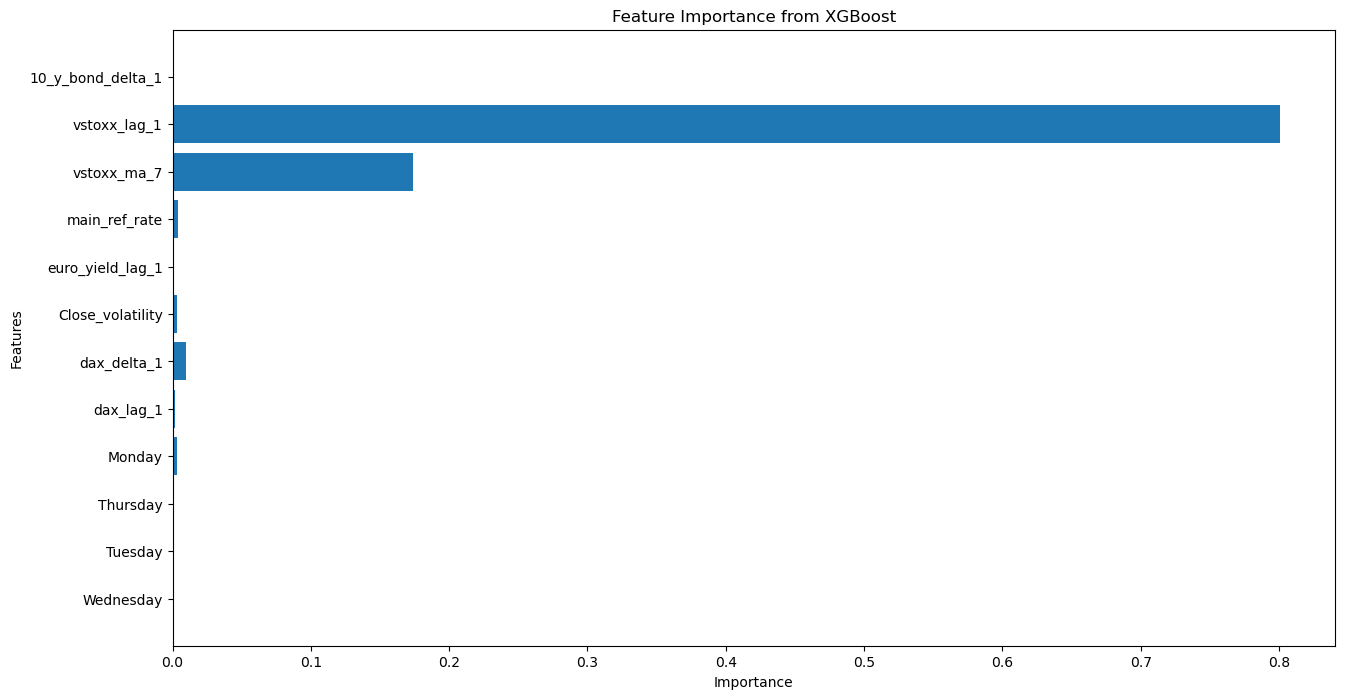

In [106]:
# Extract feature importances
feature_importance_xgb = xgb_model_1.feature_importances_

# Plot feature importances
plt.figure(figsize=(15, 8))
plt.barh(feature_names_1_xgb, feature_importance_xgb, align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()


In [107]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse_xgb = mean_squared_error(y_test_1_xgb, y_pred_1_xgb)
print(f"Mean Squared Error (MSE): {mse_xgb}")

# Calculate RMSE
rmse_xgb = np.sqrt(mse_xgb)
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")


Mean Squared Error (MSE): 0.0005779831892462962
Root Mean Squared Error (RMSE): 0.024041280940213985


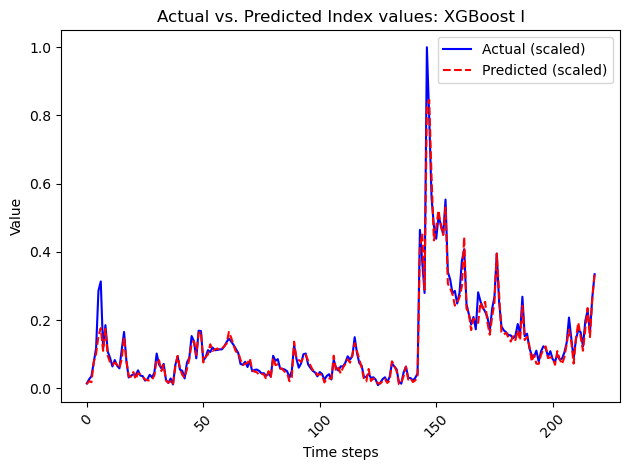

In [195]:
# store the test dates for plotting
#test_dates = scaled1_df['Date'][split_point_rf:]

plt.plot(y_test_1_xgb, label='Actual (scaled)', color='blue')
plt.plot(y_pred_1_xgb, label='Predicted (scaled)', color='red', linestyle='--')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Index values: XGBoost I')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# save the plot
plt.savefig("src/Output/Plots/fitted_XGB_I.png")
plt.show()


# XGBoost II

In [109]:
import xgboost as xgb

# Set random seed for reproducibility
np.random.seed(42)

# Sort the DataFrame by Date
scaled2_df = scaled2_df.sort_values(by='Date')

# Save the variable names for later use (excluding 'Date' and 'Indexvalue')
feature_names_2_xgb = scaled2_df.columns[scaled2_df.columns != 'Date']
feature_names_2_xgb = feature_names_2_xgb[feature_names_2_xgb != 'Indexvalue'].tolist()

# Drop the 'Date' column
scaled_data_2_xgb = scaled2_df.drop(columns=['Date']).values

# Define the split point
split_point_xgb = int(0.8 * len(scaled_data_2_xgb))

# Split the data into training and test sets
train_data_2_xgb = scaled_data_2_xgb[:split_point_xgb]
test_data_2_xgb = scaled_data_2_xgb[split_point_xgb:]

# Separate Features and Target
X_train_2_xgb = train_data_2_xgb[:, 1:]
y_train_2_xgb = train_data_2_xgb[:, 0]

X_test_2_xgb = test_data_2_xgb[:, 1:]
y_test_2_xgb = test_data_2_xgb[:, 0]


In [110]:
# Initialize the XGBoost Regressor
xgb_model_2 = xgb.XGBRegressor(
    n_estimators=200,  # Number of boosting rounds
    max_depth=6,       # Maximum depth of a tree
    learning_rate=0.1, # Step size shrinkage used in update to prevent overfitting
    objective='reg:squarederror', # Regression with squared loss
    random_state=42   # Seed for reproducibility
)

# Train the XGBoost model on the first dataset
xgb_model_2.fit(X_train_2_xgb, y_train_2_xgb)

# Predict on the test set for the first dataset
y_pred_2_xgb = xgb_model_2.predict(X_test_2_xgb)


In [111]:
feature_names_2_xgb

['10_y_bond_delta_1',
 'weighted_prob',
 'vstoxx_lag_1',
 'vstoxx_ma_7',
 'main_ref_rate',
 'moving_avg_sentiment',
 'euro_yield_lag_1',
 'Close_volatility',
 'dax_delta_1',
 'dax_lag_1',
 'Monday',
 'Thursday',
 'Tuesday',
 'Wednesday']

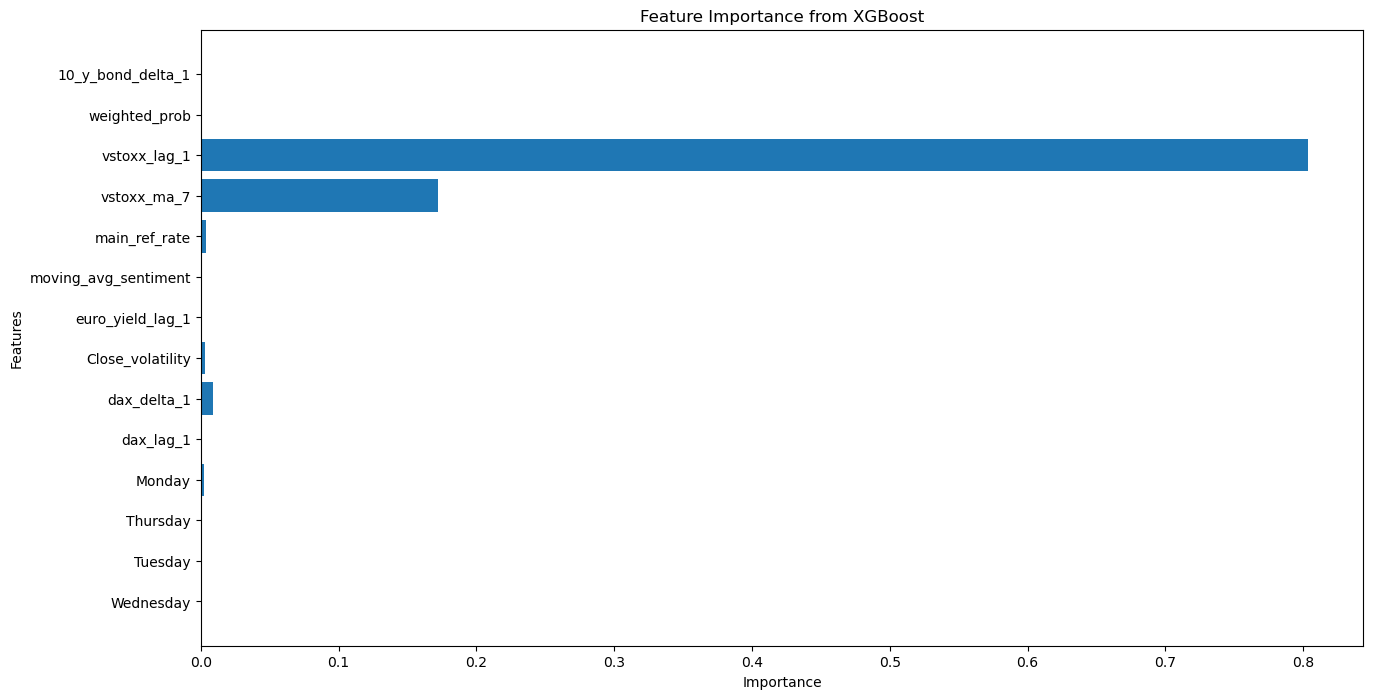

In [112]:
# Extract feature importances
feature_importance_xgb_2 = xgb_model_2.feature_importances_

# Plot feature importances
plt.figure(figsize=(15, 8))
plt.barh(feature_names_2_xgb, feature_importance_xgb_2, align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()


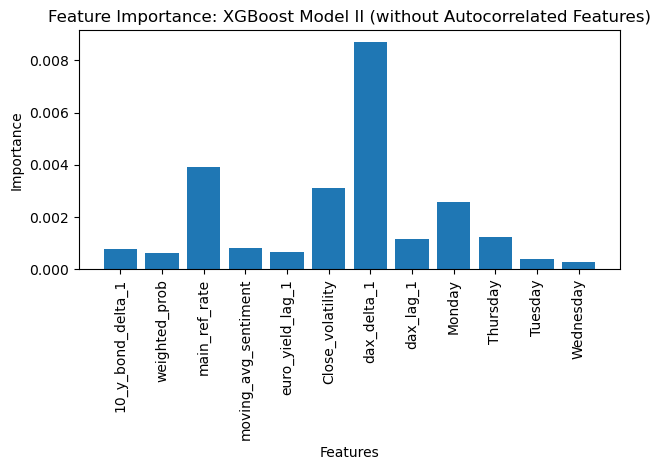

In [183]:
import pandas as pd

# Create a DataFrame with feature names and their importance values
df_importance_xgb_2 = pd.DataFrame({
    'Feature': feature_names_2_xgb,
    'Importance': feature_importance_xgb_2
})

# Remove the specified features
df_importance_xgb_2 = df_importance_xgb_2[~df_importance_xgb_2['Feature'].isin(['vstoxx_lag_1', 'vstoxx_ma_7'])]

# Plot the updated feature importance
plt.bar(df_importance_xgb_2['Feature'], df_importance_xgb_2['Importance'], align='center')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Feature Importance: XGBoost Model II (without Autocorrelated Features)')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.tight_layout()  # Adjust layout for better display
#save the plot
plt.savefig("src/Output/Plots/feature_importance_xgb_II.png")

plt.show()


In [114]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse_xgb_2 = mean_squared_error(y_test_2_xgb, y_pred_2_xgb)
print(f"Mean Squared Error (MSE): {mse_xgb_2}")

# Calculate RMSE
rmse_xgb_2 = np.sqrt(mse_xgb_2)
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_2}")

Mean Squared Error (MSE): 0.0005766722106704837
Root Mean Squared Error (RMSE): 0.024014000305456893


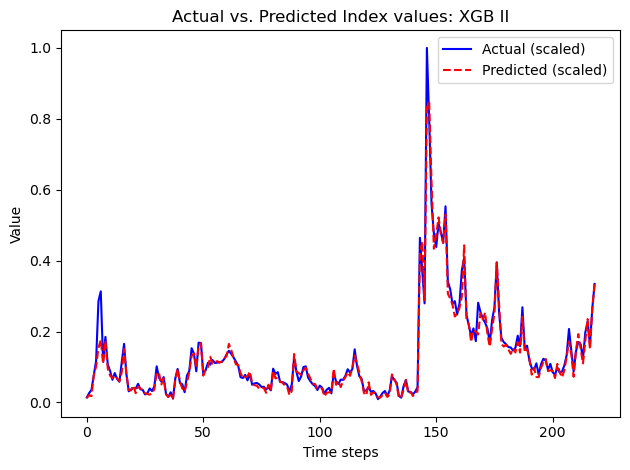

In [196]:
# take the test dates for plotting
# test_dates = scaled2_df['Date'][split_point_rf:]

plt.plot(y_test_1_xgb, label='Actual (scaled)', color='blue')
plt.plot(y_pred_1_xgb, label='Predicted (scaled)', color='red', linestyle='--')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Index values: XGB II')
plt.legend()
every_nth = 15
#plt.xticks(np.arange(0, len(test_dates), every_nth), test_dates[::every_nth], rotation=45)
plt.tight_layout()
#save the plot
plt.savefig("src/Output/Plots/fitted_xgb_II.png")
plt.show()

# Statistical significance of the difference between models

This section assesses the impact of incorporating market sentiment indicators in our time series forecasting. We train two models: one using only historical data and another with added market sentiment. Using a sliding-window approach, their performance is compared over two test windows. The goal is to statistically determine if market sentiment enhances forecast accuracy.

In [116]:
scaled1_df

,Indexvalue,10_y_bond_delta_1,vstoxx_lag_1,vstoxx_ma_7,main_ref_rate,euro_yield_lag_1,Close_volatility,dax_delta_1,dax_lag_1,Monday,Thursday,Tuesday,Wednesday,Date
0,0.035906,0.600374,0.038390,0.036785,1.0,0.640764,0.000000,0.493211,0.045468,0.0,0.0,0.0,1.0,2005-01-26
1,0.021974,0.522221,0.020462,0.019825,1.0,0.649444,0.000000,0.497805,0.050464,0.0,1.0,0.0,0.0,2005-02-03
2,0.029481,0.378967,0.019944,0.028009,1.0,0.681788,0.000000,0.512513,0.054656,1.0,0.0,0.0,0.0,2005-02-28
3,0.012090,0.330330,0.016304,0.015911,1.0,0.666233,0.000000,0.514934,0.060655,1.0,0.0,0.0,0.0,2005-03-07
4,0.036288,0.488350,0.029652,0.019063,1.0,0.669188,0.000000,0.516928,0.055605,1.0,0.0,0.0,0.0,2005-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0.197488,0.338188,0.126571,0.153245,0.0,0.094744,0.209706,0.236251,0.981068,0.0,0.0,0.0,0.0,2022-01-21
1087,0.228315,0.667383,0.177660,0.225911,0.0,0.144899,0.241233,0.271454,0.937498,0.0,0.0,0.0,0.0,2022-02-04
1088,0.162195,0.569213,0.139695,0.186492,0.0,0.165348,0.253277,0.518372,0.946594,0.0,1.0,0.0,0.0,2022-02-10
1089,0.265269,0.370380,0.207401,0.222885,0.0,0.162429,0.268154,0.396515,0.939709,0.0,1.0,0.0,0.0,2022-02-17


In [117]:
def expanding_window_split(X, test_ratio=0.2):
    """
    Generates indices for expanding window time series split.
    
    Parameters:
    - X: Data
    - test_ratio: Fraction of dataset to be used as test data.
    
    Returns:
    Generator of train indices and test indices.
    """
    num_samples = len(X)
    test_size = int(num_samples * test_ratio)
    
    if 2 * test_size > num_samples:
        raise ValueError("The dataset is not large enough for two test windows.")
    
    train_end = test_size  # Starting point for training set
    
    while train_end + test_size <= num_samples:
        yield (np.arange(0, train_end), np.arange(train_end, train_end + test_size))
        train_end += test_size

In [118]:
train_indices = []
test_indices = []

for train, test in expanding_window_split(X_1):
    train_indices.append((train[0], train[-1]))
    test_indices.append((test[0], test[-1]))

print("Train indices:", train_indices)
print("Test indices:", test_indices)


Train indices: [(0, 211), (0, 423), (0, 635), (0, 847)]
Test indices: [(212, 423), (424, 635), (636, 847), (848, 1059)]


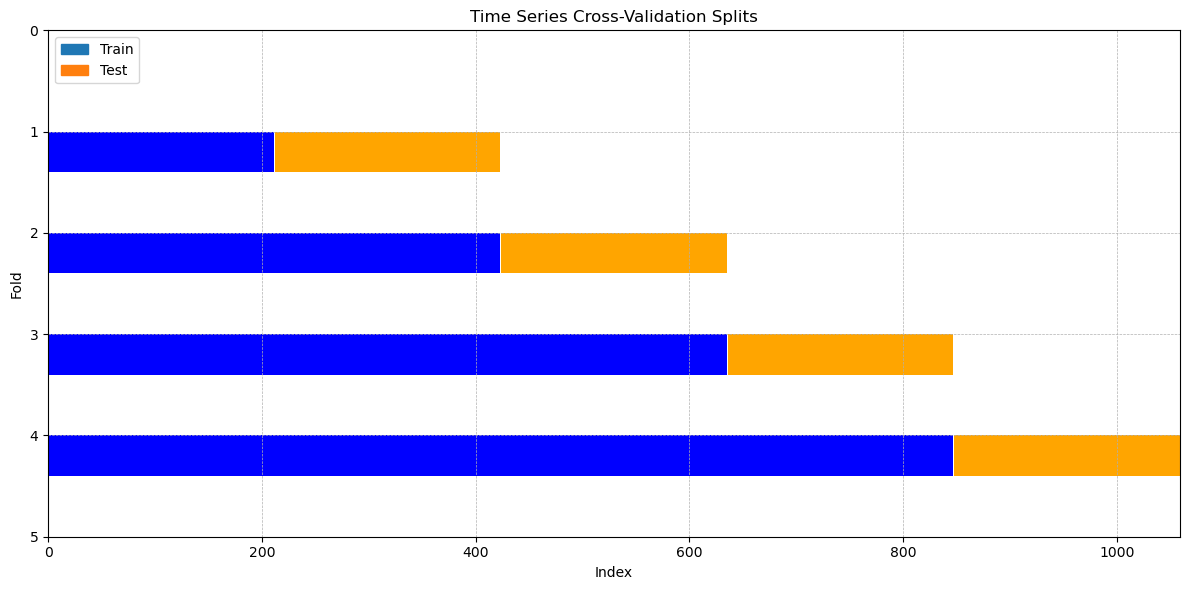

In [119]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_time_series_cv(train_indices, test_indices):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Add grid for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Set limits, labels, and title
    ax.set_xlim(0, test_indices[-1][-1])
    ax.set_ylim(0, len(train_indices) + 1)
    ax.set_ylabel('Fold')
    ax.set_xlabel('Index')
    ax.set_title('Time Series Cross-Validation Splits')
    
    # For each pair of train-test indices, plot the corresponding segments
    for idx, (train, test) in enumerate(zip(train_indices, test_indices)):
        ax.add_patch(patches.Rectangle((train[0], idx + 1), train[1]-train[0], 0.4, facecolor='blue'))
        ax.add_patch(patches.Rectangle((test[0], idx + 1), test[1]-test[0], 0.4, facecolor='orange'))

    # Add legend
    orange_patch = patches.Patch(color='#ff7f0e', label='Test')
    blue_patch = patches.Patch(color='#1f77b4', label='Train')
    ax.legend(handles=[blue_patch, orange_patch], loc="upper left")

    # invert y axis to have the first fold at the top
    ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

plot_time_series_cv(train_indices, test_indices)


In [120]:
# Initialize lists to store evaluation metrics and losses
test_mse_scores = []
test_rmse_scores = []
all_training_loss = []
all_validation_loss = []
sequence_length = 30  

for train_index, test_index in expanding_window_split(X_1):
    X_train_fold, X_test_fold = X_1[train_index], X_1[test_index]
    y_train_fold, y_test_fold = y_1[train_index], y_1[test_index]

    # Print current fold information
    print(f"Training on index range: {train_index[0]}-{train_index[-1]}")
    print(f"Testing on index range: {test_index[0]}-{test_index[-1]}")
    
    # Configure the model
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 12)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer=adam_optimizer, loss='mean_squared_error')
    
    # Train the model on the current fold data
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=64, validation_data=(X_test_fold, y_test_fold), verbose=1)

    # Storing training and validation loss
    all_training_loss.append(history.history['loss'])
    all_validation_loss.append(history.history['val_loss'])

    # Evaluate model on the test fold
    test_mse = model.evaluate(X_test_fold, y_test_fold, verbose=1)
    test_rmse = np.sqrt(test_mse)
    
    test_mse_scores.append(test_mse)
    test_rmse_scores.append(test_rmse)

Training on index range: 0-211
Testing on index range: 212-423
Epoch 1/50
4/4 [==============================] - 3s 264ms/step - loss: 0.0580 - val_loss: 0.0143
Epoch 2/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0545 - val_loss: 0.0142
Epoch 3/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0515 - val_loss: 0.0144
Epoch 4/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0486 - val_loss: 0.0144
Epoch 5/50
4/4 [==============================] - 0s 59ms/step - loss: 0.0461 - val_loss: 0.0147
Epoch 6/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0436 - val_loss: 0.0150
Epoch 7/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0414 - val_loss: 0.0155
Epoch 8/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0392 - val_loss: 0.0161
Epoch 9/50
4/4 [==============================] - 0s 40ms/step - loss: 0.0372 - val_loss: 0.0168
Epoch 10/50
4/4 [==============================] - 0s 38ms/step

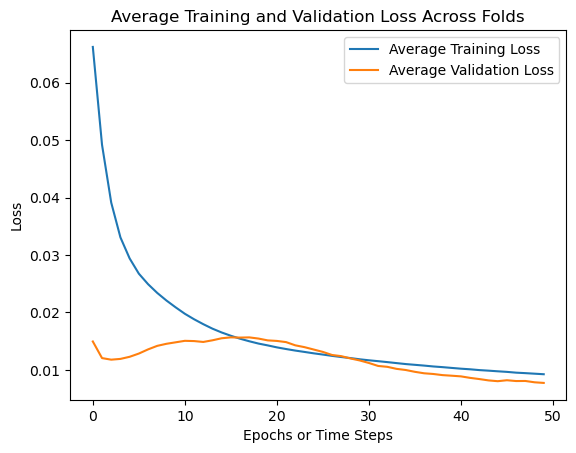

In [121]:
# Calculate average training loss at each time step across splits
average_training_loss = [sum(x) / len(x) for x in zip(*all_training_loss)]

# Calculate average validation loss at each time step across splits
average_validation_loss = [sum(x) / len(x) for x in zip(*all_validation_loss)]

#plt.figure(figsize=(10, 6))

# Plot the average training and validation losses
plt.plot(average_training_loss, label='Average Training Loss')
plt.plot(average_validation_loss, label='Average Validation Loss')
plt.title('Average Training and Validation Loss Across Folds')
plt.xlabel('Epochs or Time Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Cross validation with sentiments added to the model


In [122]:
scaled2_df

,Indexvalue,10_y_bond_delta_1,weighted_prob,vstoxx_lag_1,vstoxx_ma_7,main_ref_rate,moving_avg_sentiment,euro_yield_lag_1,Close_volatility,dax_delta_1,dax_lag_1,Monday,Thursday,Tuesday,Wednesday,Date
0,0.035906,0.600374,0.881511,0.038390,0.036785,1.0,0.824089,0.640764,0.000000,0.493211,0.045468,0.0,0.0,0.0,1.0,2005-01-26
1,0.021974,0.522221,0.863662,0.020462,0.019825,1.0,0.816841,0.649444,0.000000,0.497805,0.050464,0.0,1.0,0.0,0.0,2005-02-03
2,0.029481,0.378967,0.551835,0.019944,0.028009,1.0,0.774259,0.681788,0.000000,0.512513,0.054656,1.0,0.0,0.0,0.0,2005-02-28
3,0.012090,0.330330,0.226526,0.016304,0.015911,1.0,0.687878,0.666233,0.000000,0.514934,0.060655,1.0,0.0,0.0,0.0,2005-03-07
4,0.036288,0.488350,1.000000,0.029652,0.019063,1.0,0.748571,0.669188,0.000000,0.516928,0.055605,1.0,0.0,0.0,0.0,2005-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0.197488,0.338188,0.938415,0.126571,0.153245,0.0,0.603029,0.094744,0.209706,0.236251,0.981068,0.0,0.0,0.0,0.0,2022-01-21
1087,0.228315,0.667383,0.528345,0.177660,0.225911,0.0,0.586222,0.144899,0.241233,0.271454,0.937498,0.0,0.0,0.0,0.0,2022-02-04
1088,0.162195,0.569213,0.458849,0.139695,0.186492,0.0,0.574059,0.165348,0.253277,0.518372,0.946594,0.0,1.0,0.0,0.0,2022-02-10
1089,0.265269,0.370380,0.613944,0.207401,0.222885,0.0,0.622397,0.162429,0.268154,0.396515,0.939709,0.0,1.0,0.0,0.0,2022-02-17


In [123]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


# Step 1: Data Preparation
# Extract features and target
X_2 = scaled2_df.drop(columns=['Date', 'Indexvalue']).values
y_2 = scaled2_df['Indexvalue'].values

num_features = X_2.shape[1]

# Convert data into sequences for LSTM
def transform_to_sequences(data, target, sequence_length):
    seq_data = []
    seq_target = []

    for i in range(len(data) - sequence_length):
        seq_data.append(data[i:i + sequence_length])
        seq_target.append(target[i + sequence_length])

    return np.array(seq_data), np.array(seq_target)

X_2, y_2 = transform_to_sequences(X_2, y_2, sequence_length)


# Step 3: Model Training and Evaluation
test_mse_scores_2 = []
test_rmse_scores_2 = []
all_training_loss_2 = []
all_validation_loss_2 = []

for train_index, test_index in expanding_window_split(X_2):
    X_train_fold, X_test_fold = X_2[train_index], X_2[test_index]
    y_train_fold, y_test_fold = y_2[train_index], y_2[test_index]

    # Print current fold information
    print(f"Training on index range: {train_index[0]}-{train_index[-1]}")
    print(f"Testing on index range: {test_index[0]}-{test_index[-1]}")
    
    # Configure the model
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, num_features)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer=adam_optimizer, loss='mean_squared_error')
    
    # Train the model on the current fold data
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=64, validation_data=(X_test_fold, y_test_fold), verbose=1)

    # Storing training and validation loss
    all_training_loss_2.append(history.history['loss'])
    all_validation_loss_2.append(history.history['val_loss'])

    # Evaluate model on the test fold
    test_mse = model.evaluate(X_test_fold, y_test_fold, verbose=1)
    test_rmse = np.sqrt(test_mse)
    
    test_mse_scores_2.append(test_mse)
    test_rmse_scores_2.append(test_rmse)


Training on index range: 0-211
Testing on index range: 212-423


Epoch 1/50
4/4 [==============================] - 4s 234ms/step - loss: 0.0723 - val_loss: 0.0380
Epoch 2/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0628 - val_loss: 0.0289
Epoch 3/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0562 - val_loss: 0.0223
Epoch 4/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0506 - val_loss: 0.0180
Epoch 5/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0469 - val_loss: 0.0151
Epoch 6/50
4/4 [==============================] - 0s 35ms/step - loss: 0.0436 - val_loss: 0.0135
Epoch 7/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0409 - val_loss: 0.0125
Epoch 8/50
4/4 [==============================] - 0s 35ms/step - loss: 0.0380 - val_loss: 0.0119
Epoch 9/50
4/4 [==============================] - 0s 35ms/step - loss: 0.0354 - val_loss: 0.0116
Epoch 10/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0330 - val_loss: 0.0113
Epoch 11/50
4/4 [===========

In [124]:
# Metrics for Test MSE and Test RMSE
mean_test_mse_2 = np.mean(test_mse_scores_2)
std_test_mse_2 = np.std(test_mse_scores_2)
mean_test_rmse_2 = np.mean(test_rmse_scores_2)
std_test_rmse_2 = np.std(test_rmse_scores_2)

print(f"Mean Test MSE: {mean_test_mse_2:.5f}")
print(f"Standard Deviation of Test MSE: {std_test_mse_2:.5f}")
print(f"Mean Test RMSE: {mean_test_rmse_2:.5f}")
print(f"Standard Deviation of Test RMSE: {std_test_rmse_2:.5f}")


Mean Test MSE: 0.00807
Standard Deviation of Test MSE: 0.00502
Mean Test RMSE: 0.08467
Standard Deviation of Test RMSE: 0.03009


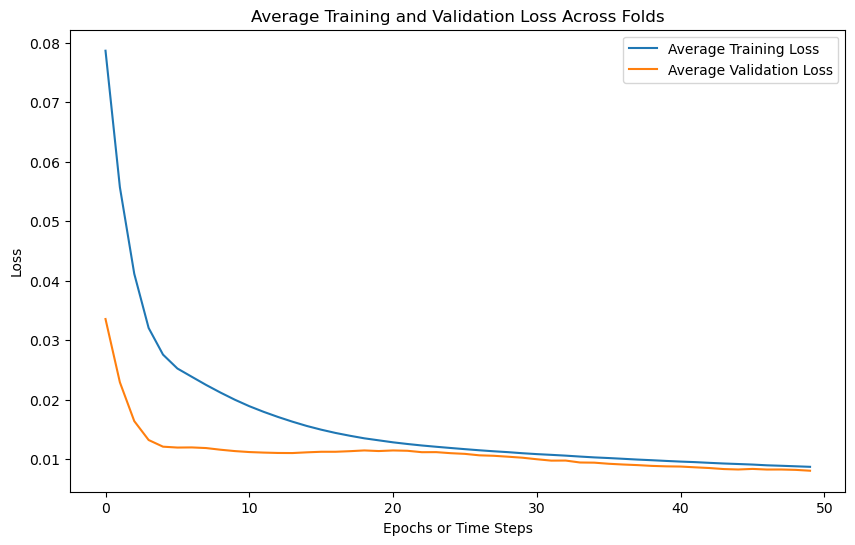

In [125]:
# Calculate average training loss at each time step across splits
average_training_loss_2 = [sum(x) / len(x) for x in zip(*all_training_loss_2)]

# Calculate average validation loss at each time step across splits
average_validation_loss_2 = [sum(x) / len(x) for x in zip(*all_validation_loss_2)]

# Plot the average training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(average_training_loss_2, label='Average Training Loss')
plt.plot(average_validation_loss_2, label='Average Validation Loss')
plt.title('Average Training and Validation Loss Across Folds')
plt.xlabel('Epochs or Time Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()


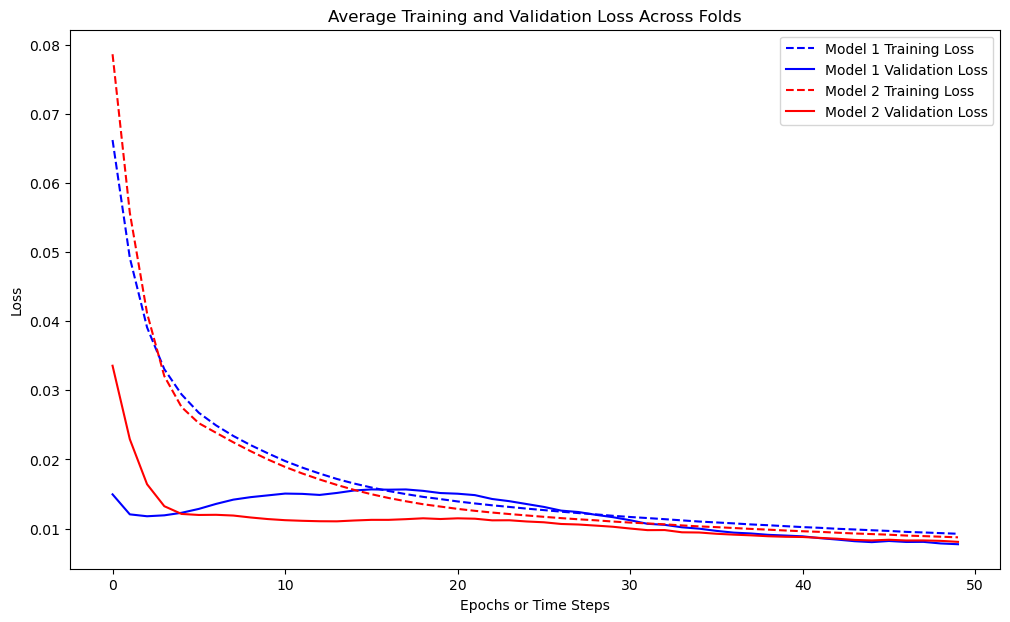

In [126]:
import matplotlib.pyplot as plt

# Combined Average Training & Validation Loss Curves
plt.figure(figsize=(12, 7))
plt.plot(average_training_loss, label='Model 1 Training Loss', color='blue', linestyle='--')
plt.plot(average_validation_loss, label='Model 1 Validation Loss', color='blue')
plt.plot(average_training_loss_2, label='Model 2 Training Loss', color='red', linestyle='--')
plt.plot(average_validation_loss_2, label='Model 2 Validation Loss', color='red')
plt.title('Average Training and Validation Loss Across Folds')
plt.xlabel('Epochs or Time Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Permutation importance: LSTM

In [128]:
from sklearn.metrics import mean_squared_error

# 1. Compute the Baseline Performance
baseline_predictions = model_2_LSTM.predict(X_test_2)
baseline_mse = mean_squared_error(y_test_2, baseline_predictions)

 8/10 [=======================>......] - ETA: 0s

10/10 [==============================] - 0s 8ms/step


In [129]:
# list of feature names to be permuted
feature_names = ["moving_average_sentiment", "weighted_prob"]

# extract the index of the feature names
feature_name_to_idx = {name: idx for idx, name in enumerate(feature_names)}

# permutation importance function
def compute_permutation_importance(model, X_test, y_test, feature_names, n_repeats=30):
    
    """
    Compute the permutation importance of features for a given model.

    Permutation importance is calculated by permuting the values of each feature 
    and measuring the change in model performance. A larger change indicates higher 
    importance of the feature.

    Parameters:
    - model (Model): The trained model for which feature importance is to be computed.
    - X_test (numpy.array): The test input data.
    - y_test (numpy.array): The true output values for the test data.
    - feature_names (list of str): Names of the features in the dataset.
    - n_repeats (int, optional): Number of times to repeat the permutation process for each feature. 
                                  Default is 30.

    Returns:
    - dict: A dictionary containing the permutation importance of each feature.
    """

    importances = {feature: 0 for feature in feature_names}
    
    for _ in range(n_repeats):
        for feature in feature_names:
            feature_idx = feature_name_to_idx[feature]
            X_test_permuted = X_test.copy()
            np.random.shuffle(X_test_permuted[:, feature_idx])
            permuted_predictions = model.predict(X_test_permuted)
            permuted_mse = mean_squared_error(y_test, permuted_predictions)
            importances[feature] += (permuted_mse - baseline_mse) / n_repeats  # accumulate and average
    
    return importances

In [130]:
# Compute averaged permutation importance for the desired features
features_to_permute = ["moving_average_sentiment", "weighted_prob"]

# Compute permutation importance
importances = compute_permutation_importance(model_2_LSTM, X_test_2, y_test_2, features_to_permute)

# set the number of repeats
n_repeats=30

# Print the averaged results
for feature, importance in importances.items():
    print(f"Permutation Importance of {feature} (averaged over {n_repeats} repeats):", importance)

10/10 [==============================] - 0s 6ms/step
Permutation Importance of moving_average_sentiment (averaged over 30 repeats): 2.3316907080110692e-05
Permutation Importance of weighted_prob (averaged over 30 repeats): 5.297904963712012e-06


# Permuted Transformers

In [131]:
# Print the results
print(f"Mean Squared Error (MSE): {mse_scaled_transformers_2}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled_transformers_2}")


Mean Squared Error (MSE): 0.08652096595168964
Root Mean Squared Error (RMSE): 0.2941444644246933


In [132]:
# Compute averaged permutation importance for the desired features
features_to_permute = ["moving_average_sentiment", "weighted_prob"]
importances = compute_permutation_importance(model_2_transformers, X_2_test_seq, y_2_test_seq, features_to_permute)

# set the number of repeats
n_repeats=30
# Print the averaged results
for feature, importance in importances.items():
    print(f"Permutation Importance of {feature} (averaged over {n_repeats} repeats):", importance)

 1/10 [==>...........................] - ETA: 0s

10/10 [==============================] - 0s 5ms/step
Permutation Importance of moving_average_sentiment (averaged over 30 repeats): 0.04772552314686902
Permutation Importance of weighted_prob (averaged over 30 repeats): 0.04782865917870012


# Randomness in LSTM